## Importing Libraries and Data

In [87]:
#from google.colab import drive
#drive.mount('/content/drive')

In [88]:
#!pip install numpy
#!pip install pandas matplotlib

In [89]:
#!pip install seaborn

In [90]:
#!pip install imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# from google.colab import files

# # Upload the file to Colab
# uploaded = files.upload()

In [3]:
import pandas as pd

# Load the dataset using pandas
data = pd.read_csv('creditcard.csv')

# Display basic information about the DataFrame
print("Pandas DataFrame Information:")
print(data.info())

# Count the number of rows where Class == 1 (fraudulent transactions)
fraud_count = data[data['Class'] == 1].shape[0]
print(f"Number of fraudulent transactions (Class == 1) in DataFrame: {fraud_count}")

Pandas DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non

In [4]:
import csv

# Initialize counters
row_count = 0
fraud_count_csv = 0

# Read the CSV file directly
with open('creditcard.csv', mode='r') as file:
    csv_reader = csv.reader(file)

    # Read the header
    header = next(csv_reader)
    print(f"Header from CSV file: {header}")

    # Iterate through rows
    for row in csv_reader:
        row_count += 1
        if row[-1] == '1':  # Assuming 'Class' is the last column in the CSV
            fraud_count_csv += 1

print(f"Total rows in the CSV file: {row_count}")
print(f"Number of fraudulent transactions (Class == 1) in CSV: {fraud_count_csv}")

Header from CSV file: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Total rows in the CSV file: 284807
Number of fraudulent transactions (Class == 1) in CSV: 492


In [5]:
# Check if the row count matches
if data.shape[0] == row_count:
    print("Row count matches between CSV file and DataFrame.")
else:
    print("Row count mismatch!")

# Check if the fraud count matches
if fraud_count == fraud_count_csv:
    print("Fraud count matches between CSV file and DataFrame.")
else:
    print("Fraud count mismatch!")

# Optional: Compare other statistics (e.g., means, medians)
print("\nComparison of 'Amount' column statistics:")
print("DataFrame 'Amount' mean:", data['Amount'].mean())
print("DataFrame 'Amount' median:", data['Amount'].median())

# You can similarly compute statistics directly from the CSV file if needed

Row count matches between CSV file and DataFrame.
Fraud count matches between CSV file and DataFrame.

Comparison of 'Amount' column statistics:
DataFrame 'Amount' mean: 88.34961925093133
DataFrame 'Amount' median: 22.0


In [6]:
# Filter the data for fraudulent transactions (Class == 1)
fraud = data[data['Class'] == 1]

# Display the first 5 rows of fraudulent transactions
print("First 5 rows of fraudulent transactions:")
print(fraud.head())

# Display the last 5 rows of fraudulent transactions
print("\nLast 5 rows of fraudulent transactions:")
print(fraud.tail())

First 5 rows of fraudulent transactions:
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount 

In [7]:
# Count the number of rows and columns
num_rows, num_columns = data.shape

# Display the counts
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 284807 rows and 31 columns.


In [8]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Generate summary statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# If missing values were already filled during cleaning, no need to fill again
# Check for missing values after handling
print("Missing values after cleaning:")
print(data.isnull().sum())

Missing values after cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

# Step 1: Check for duplicate rows
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

# Step 2: Display duplicate rows (if any)
if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(data[duplicates])

# Step 3: Analyze duplicates by Class
# Check the distribution of 'Class' among the duplicates
fraudulent_duplicates = data[duplicates & (data['Class'] == 1)]
non_fraudulent_duplicates = data[duplicates & (data['Class'] == 0)]

print(f"\nNumber of duplicate fraudulent transactions (Class == 1): {fraudulent_duplicates.shape[0]}")
print(f"Number of duplicate non-fraudulent transactions (Class == 0): {non_fraudulent_duplicates.shape[0]}")

# Step 4: Check if retaining one of the duplicates keeps fraud records intact
if not fraudulent_duplicates.empty:
    print("\nFirst few duplicate fraudulent records:")
    print(fraudulent_duplicates.head())

# Step 5: Separate the data into fraudulent and non-fraudulent
fraudulent_data = data[data['Class'] == 1]
non_fraudulent_data = data[data['Class'] == 0]

# Step 6: Handle duplicates for both classes by keeping the first occurrence
# - For fraudulent transactions, keep the first occurrence of each duplicate
fraudulent_data_cleaned = fraudulent_data.drop_duplicates(keep='first')

# - For non-fraudulent transactions, also keep the first occurrence of each duplicate
non_fraudulent_data_cleaned = non_fraudulent_data.drop_duplicates(keep='first')

# Step 7: Combine the cleaned data back together
data_cleaned = pd.concat([fraudulent_data_cleaned, non_fraudulent_data_cleaned], axis=0)

# Step 8: Check the number of rows before and after dropping duplicates
print(f"\nNumber of rows before dropping duplicates: {data.shape[0]}")
print(f"Number of rows after dropping duplicates: {data_cleaned.shape[0]}")

# Step 9: Check the number of fraudulent transactions to ensure none are lost
fraudulent_count = data_cleaned[data_cleaned['Class'] == 1].shape[0]
print(f"Number of fraudulent transactions (Class == 1) after dropping duplicates: {fraudulent_count}")

# Check the number of non-fraudulent transactions to ensure minimal loss
non_fraudulent_count = data_cleaned[data_cleaned['Class'] == 0].shape[0]
print(f"Number of non-fraudulent transactions (Class == 0) after dropping duplicates: {non_fraudulent_count}")

# Save the cleaned dataset if needed
data_cleaned.to_csv('creditcard_cleaned.csv', index=False)

# Optional: Display the first few rows of cleaned data
print("\nFirst few rows of the cleaned dataset:")
print(data_cleaned.head())

Number of duplicate rows in the dataset: 1081

Duplicate rows:
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 

In [49]:
import pandas as pd
import numpy as np

# Load the dataset
# data_cleaned = pd.read_csv('credit_card.csv')

# Ensure 'TransactionDate' is in datetime format
data_cleaned['TransactionDate'] = pd.to_datetime(data_cleaned['Time'], errors='coerce')

# Check for conversion issues
if data_cleaned['TransactionDate'].isnull().any():
    print("Warning: Some dates could not be converted and are now NaT (Not a Time).")

# 1. Log Transformation of Transaction Amount
data_cleaned['LogAmount'] = np.log1p(data_cleaned['Amount'])

# 2. Binning Transaction Amount
bins = [0, 50, 100, 200, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
data_cleaned['AmountBin'] = pd.cut(data_cleaned['Amount'], bins=bins, labels=labels)

# 3. Time-Based Features
# Check if 'TransactionDate' conversion was successful
if data_cleaned['TransactionDate'].dtype == 'datetime64[ns]':
    data_cleaned['TransactionDay'] = data_cleaned['TransactionDate'].dt.day
    data_cleaned['TransactionMonth'] = data_cleaned['TransactionDate'].dt.month
    data_cleaned['TransactionYear'] = data_cleaned['TransactionDate'].dt.year

    # Calculate Time Since Last Transaction (example)
    data_cleaned.sort_values(by='TransactionDate', inplace=True)
    data_cleaned['TimeSinceLastTransaction'] = data_cleaned['TransactionDate'].diff().dt.days.fillna(0)
else:
    print("Error: 'TransactionDate' column is not in datetime format.")

# 4. Aggregated Features
monthly_spend = data_cleaned.groupby(['TransactionYear', 'TransactionMonth'])['Amount'].sum().reset_index()
monthly_spend.rename(columns={'Amount': 'MonthlySpend'}, inplace=True)

# Merge aggregated features back to the original dataframe
data_cleaned = data_cleaned.merge(monthly_spend, on=['TransactionYear', 'TransactionMonth'], how='left')

# 5. Categorical Encodings (one-hot encoding for 'MerchantCategory')
if 'MerchantCategory' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['MerchantCategory'], prefix='Merchant')
else:
    print("Column 'MerchantCategory' not found in the DataFrame.")

# Display the updated dataframe
print(data_cleaned.head())


Column 'MerchantCategory' not found in the DataFrame.
                 Time        V1        V2        V3        V4        V5  \
0 2013-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
3 2013-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
4 2013-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...  Class     TransactionDate  \
0  0.462388  0.239599  0.098698  0.363787  ...      0 2013-01-01 00:00:00   
1 -0.082361 -0.078803  0.085102 -0.255425  ...      0 2013-01-01 00:00:00   
2  1.247203  0.237609  0.377436 -1.387024  ...      0 2013-01-01 00:00:01   
3  1.800499  0.791461  0.247676 -1.514654  ...      0 2013-01-01 00:00:01   
4  0.095921  0.592941 -0.270533  0.817739  ...      0 2013-01-01 00:00:02   

   LogAmount  AmountBin  Transac

#### performing data exploration

In [55]:
import pandas as pd
import numpy as np

# Load the dataset
# data_cleaned = pd.read_csv('credit_card.csv')

# Ensure 'TransactionDate' is in datetime format
data_cleaned['TransactionDate'] = pd.to_datetime(data_cleaned['Time'], errors='coerce')

# Check for conversion issues
if data_cleaned['TransactionDate'].isnull().any():
    print("Warning: Some dates could not be converted and are now NaT (Not a Time).")

# Print columns to check if 'Amount' exists
print("Columns in data_cleaned before transformations:", data_cleaned.columns)

# 1. Log Transformation of Transaction Amount
if 'Amount' in data_cleaned.columns:
    data_cleaned['LogTransactionAmount'] = np.log1p(data_cleaned['Amount'])
else:
    print("Column 'Amount' not found in the DataFrame.")

# 2. Binning Transaction Amount
if 'Amount' in data_cleaned.columns:
    bins = [0, 50, 100, 200, np.inf]
    labels = ['Low', 'Medium', 'High', 'Very High']
    data_cleaned['AmountBin'] = pd.cut(data_cleaned['Amount'], bins=bins, labels=labels)
else:
    print("Column 'Amount' not found in the DataFrame for binning.")

# 3. Time-Based Features
data_cleaned['TransactionDay'] = data_cleaned['TransactionDate'].dt.day
data_cleaned['TransactionMonth'] = data_cleaned['TransactionDate'].dt.month
data_cleaned['TransactionYear'] = data_cleaned['TransactionDate'].dt.year

# Calculate Time Since Last Transaction
data_cleaned.sort_values(by='TransactionDate', inplace=True)
data_cleaned['TimeSinceLastTransaction'] = data_cleaned['TransactionDate'].diff().dt.days.fillna(0)

# 4. Aggregated Features
if 'Amount' in data_cleaned.columns:
    monthly_spend = data_cleaned.groupby(['TransactionYear', 'TransactionMonth'])['Amount'].sum().reset_index()
    monthly_spend.rename(columns={'Amount': 'MonthlySpend'}, inplace=True)

    # Print columns to check for conflicts
    print("Columns in data_cleaned before merge:", data_cleaned.columns)
    print("Columns in monthly_spend:", monthly_spend.columns)

    # Ensure no column conflicts before merging
    if 'MonthlySpend' in data_cleaned.columns:
        data_cleaned.rename(columns={'MonthlySpend': 'PreviousMonthlySpend'}, inplace=True)

    # Merge aggregated features back to the original dataframe
    data_cleaned = data_cleaned.merge(monthly_spend, on=['TransactionYear', 'TransactionMonth'], how='left')
else:
    print("Column 'Amount' not found in the DataFrame for aggregation.")

# 5. Categorical Encodings (one-hot encoding for 'MerchantCategory')
# Check if 'MerchantCategory' is present before encoding
if 'MerchantCategory' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['MerchantCategory'], prefix='Merchant')
else:
    print("Column 'MerchantCategory' not found in the DataFrame.")

# Display the updated dataframe
print(data_cleaned.head())

Columns in data_cleaned before transformations: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'OriginalAmount', 'Class', 'TransactionDate', 'LogAmount', 'AmountBin',
       'TransactionDay', 'TransactionMonth', 'TransactionYear',
       'TimeSinceLastTransaction', 'MonthlySpend_x', 'MonthlySpend_y',
       'LogTransactionAmount', 'MonthlySpend'],
      dtype='object')
Column 'Amount' not found in the DataFrame.
Column 'Amount' not found in the DataFrame for binning.
Column 'Amount' not found in the DataFrame for aggregation.
Column 'MerchantCategory' not found in the DataFrame.
                 Time        V1        V2        V3        V4        V5  \
0 2013-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-01-01 

#### 1. Exploratory Data Analysis (EDA)
Visualizations: Create plots to explore distributions, relationships, and patterns. For example, use histograms to visualize transaction amounts, or bar plots to see the frequency of different merchant categories.
Summary Statistics: Compute summary statistics like mean, median, standard deviation, and counts to understand the data better.

Columns in data_cleaned: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'OriginalAmount', 'Class', 'TransactionDate', 'LogAmount', 'AmountBin',
       'TransactionDay', 'TransactionMonth', 'TransactionYear',
       'TimeSinceLastTransaction', 'MonthlySpend_x', 'MonthlySpend_y',
       'LogTransactionAmount', 'MonthlySpend'],
      dtype='object')
Column 'Amount' not found in data_cleaned.


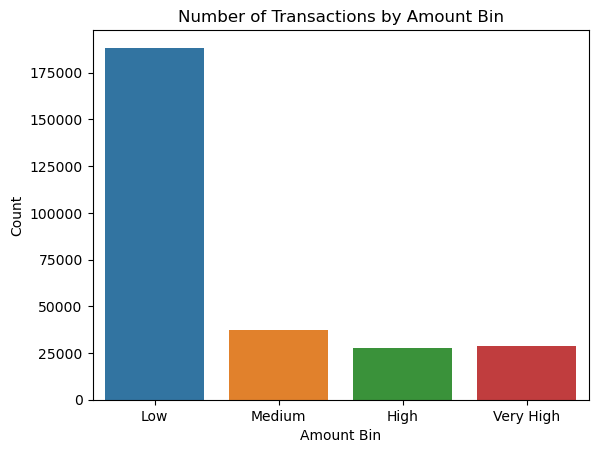

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check columns in data_cleaned before plotting
print("Columns in data_cleaned:", data_cleaned.columns)

# Histogram of transaction amounts
if 'Amount' in data_cleaned.columns:
    plt.hist(data_cleaned['Amount'], bins=30, edgecolor='k')
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Amount' not found in data_cleaned.")

# Bar plot of amount bins
if 'AmountBin' in data_cleaned.columns:
    sns.countplot(data=data_cleaned, x='AmountBin')
    plt.title('Number of Transactions by Amount Bin')
    plt.xlabel('Amount Bin')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'AmountBin' not found in data_cleaned.")



#### 2. Feature Selection and Engineering
Feature Importance: Evaluate which features are most important for predicting the target variable using algorithms like Random Forests or XGBoost.
Correlation Analysis: Examine correlations between features to identify redundant or highly correlated features.

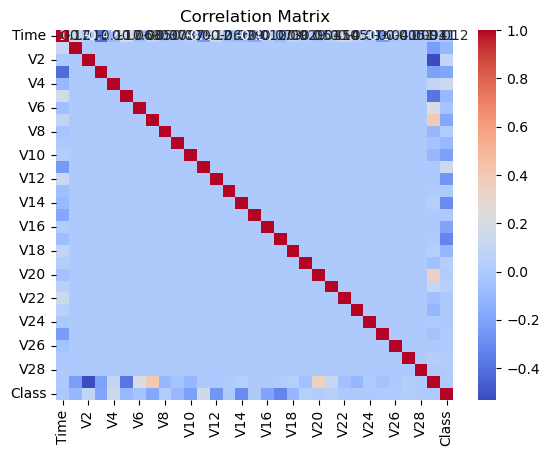

In [58]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

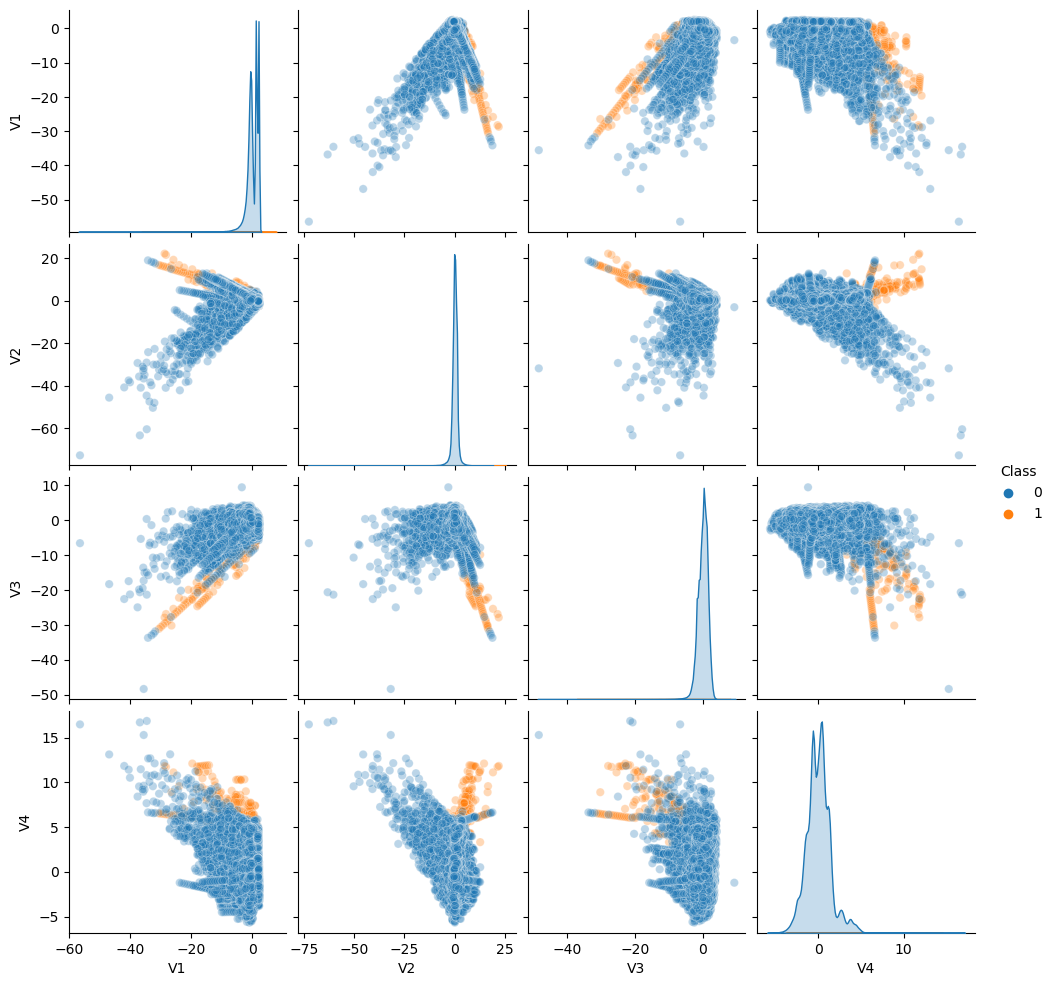

In [12]:
# Pairplot for a subset of variables (e.g., 'V1', 'V2', 'V3', 'V4', and 'Class')
sns.pairplot(data_cleaned[['V1', 'V2', 'V3', 'V4', 'Class']], hue='Class', plot_kws={'alpha':0.3})
plt.show()

In [13]:
# Convert 'Time' column to datetime format by adding it to a reference date
# Assuming 'Time' represents seconds since the first transaction
reference_date = pd.Timestamp('2013-01-01')  # Example reference date (Unix epoch)
data_cleaned['Time'] = reference_date + pd.to_timedelta(data['Time'], unit='s')

# Verify the conversion
print(data_cleaned['Time'].head())
print(data_cleaned.info())

541    2013-01-01 00:06:46
623    2013-01-01 00:07:52
4920   2013-01-01 01:14:22
6108   2013-01-01 01:56:26
6329   2013-01-01 02:05:19
Name: Time, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 541 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    283726 non-null  datetime64[ns]
 1   V1      283726 non-null  float64       
 2   V2      283726 non-null  float64       
 3   V3      283726 non-null  float64       
 4   V4      283726 non-null  float64       
 5   V5      283726 non-null  float64       
 6   V6      283726 non-null  float64       
 7   V7      283726 non-null  float64       
 8   V8      283726 non-null  float64       
 9   V9      283726 non-null  float64       
 10  V10     283726 non-null  float64       
 11  V11     283726 non-null  float64       
 12  V12     283726 non-null  float64       
 13  V13     283726 non-null  float64       
 14

In [14]:
data_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,2013-01-01 00:06:46,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,2013-01-01 00:07:52,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,2013-01-01 01:14:22,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,2013-01-01 01:56:26,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,2013-01-01 02:05:19,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [15]:
# Filter the data for fraudulent transactions (Class = 1)
fraud = data_cleaned[data_cleaned['Class'] == 1]

# Display the last 5 rows of fraudulent transactions
fraud.tail(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,2013-01-02 22:59:02,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,2013-01-02 23:02:27,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,2013-01-02 23:02:31,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,2013-01-02 23:12:46,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,2013-01-02 23:19:08,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [16]:
# Filter the data for normal transactions (Class = 0)
normal = data_cleaned[data_cleaned['Class'] == 0]

# Display the last 5 rows of normal transactions
normal.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,2013-01-02 23:59:46,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2013-01-02 23:59:47,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2013-01-02 23:59:48,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2013-01-02 23:59:48,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,2013-01-02 23:59:52,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data Visualization

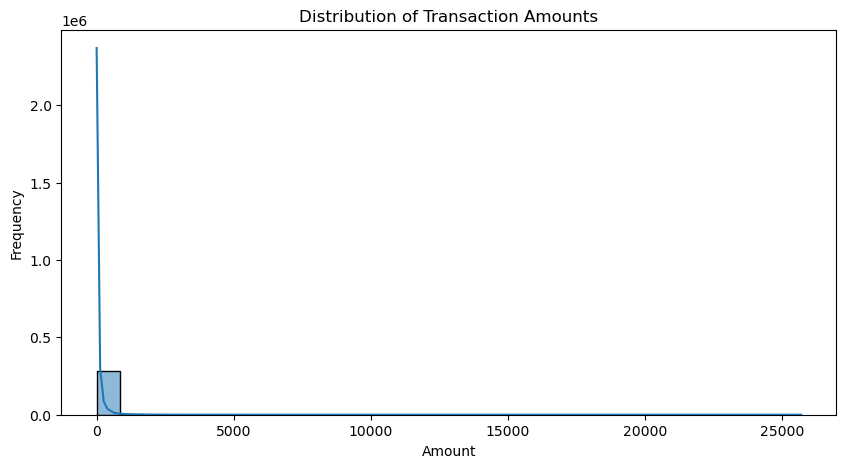

In [17]:
# -------------------------
# 1. Univariate Analysis
# -------------------------
# Transaction Amount (Amount) Distribution
# Distribution of the Amount column
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

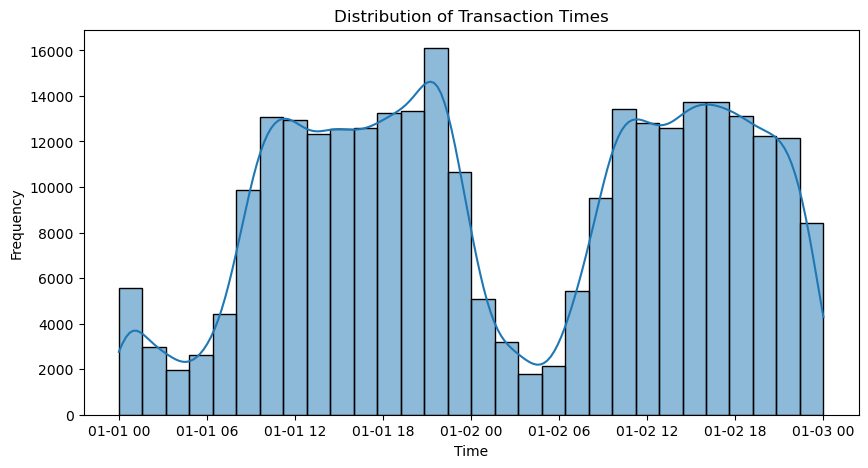

In [18]:
#---------------------------------
# a. Distribution of the Time column
#---------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['Time'], bins=30, kde=True)
plt.title('Distribution of Transaction Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

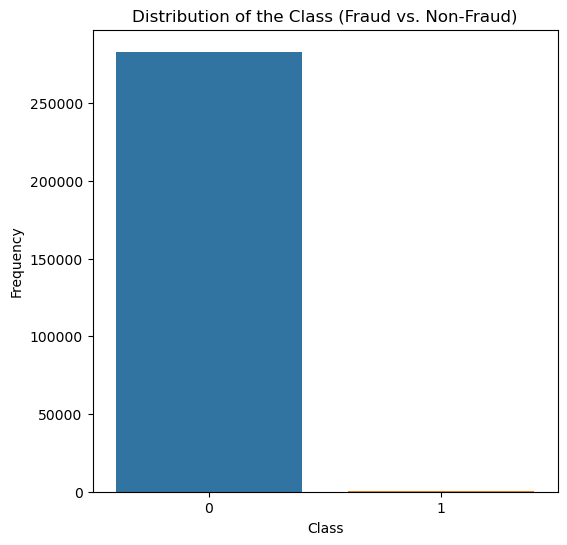

In [19]:
#------------------------------------------------------
# b. Distribution of the Class column (target variable)
#------------------------------------------------------
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=data_cleaned)
plt.title('Distribution of the Class (Fraud vs. Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

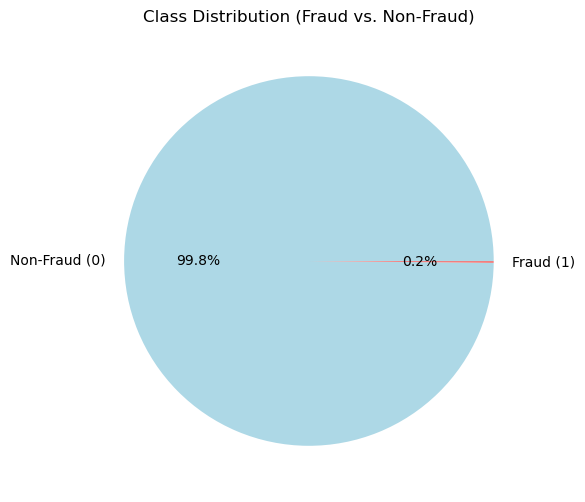

In [20]:
#------------------------------------
# c. Pie chart for Class distribution
#------------------------------------
plt.figure(figsize=(6, 6))
data_cleaned['Class'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'lightcoral'], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.ylabel('')
plt.show()

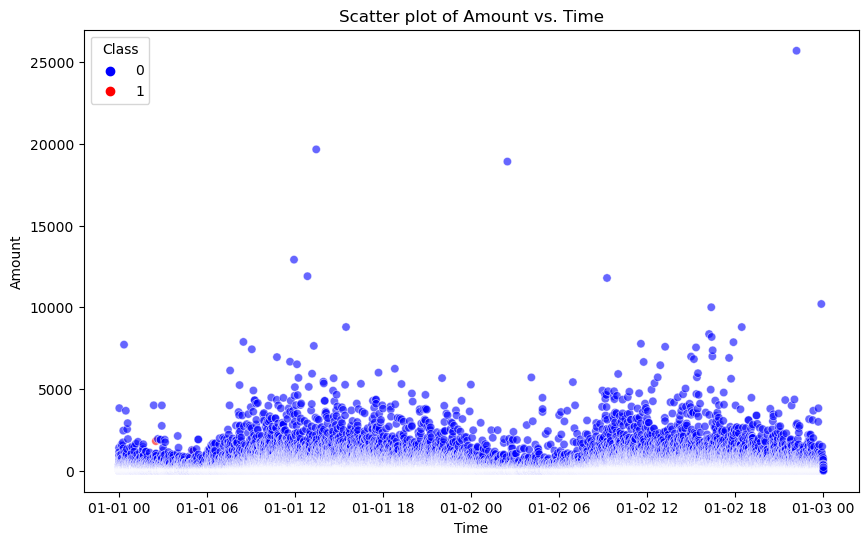

In [21]:
# -------------------------
# 2. Bivariate Analysis
# -------------------------
# Scatter plot of Amount vs. Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data_cleaned, alpha=0.6, palette=['blue', 'red'])
plt.title('Scatter plot of Amount vs. Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

# Correlation Analysis

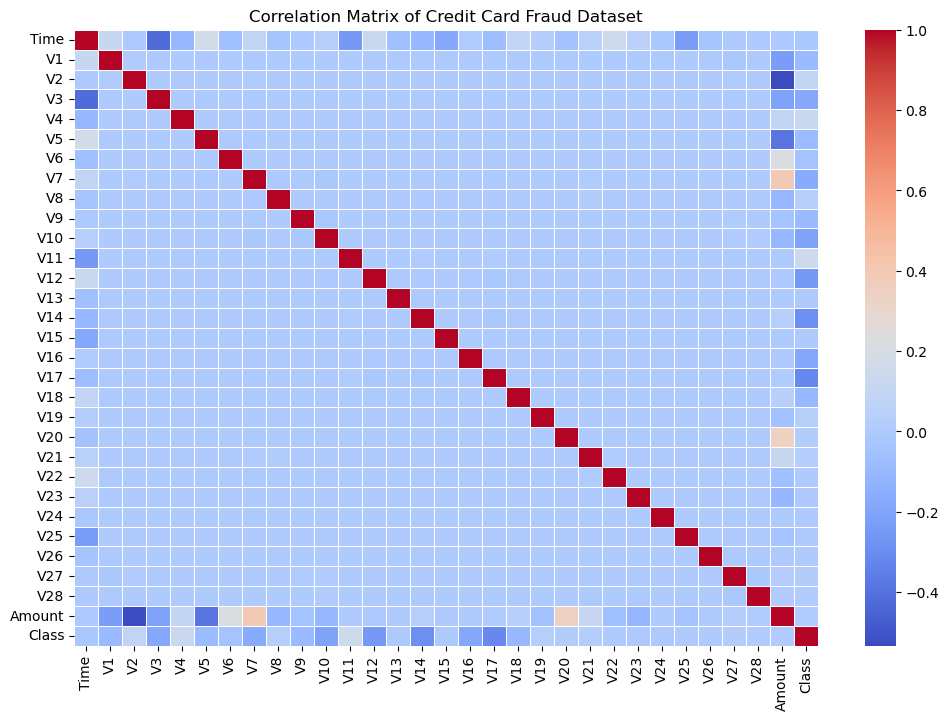

In [22]:
# ----------------------
# b. Correlation matrix
# ----------------------
plt.figure(figsize=(12, 8))
corr = data_cleaned.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Credit Card Fraud Dataset')
plt.show()

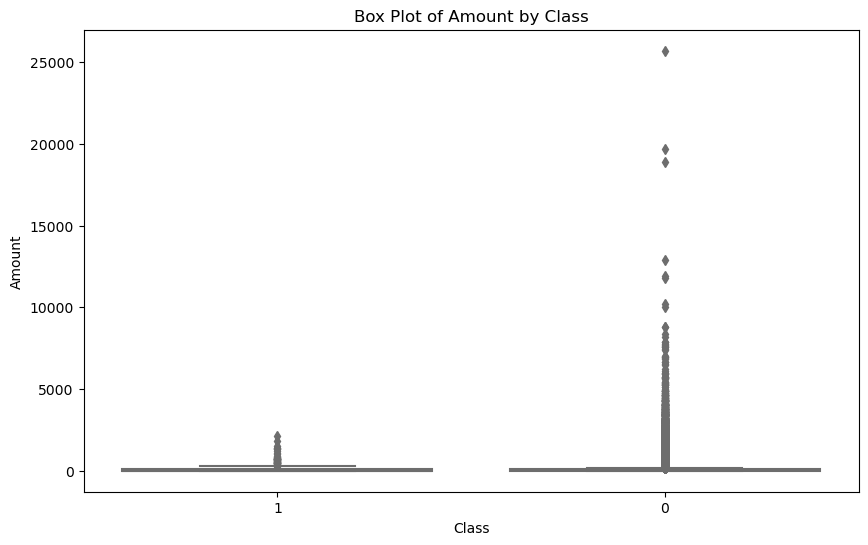

In [24]:
# ------------------------------
# a. Box plot of Amount by Class
# ------------------------------
# Box plot of Amount by Class with distinct colors for each class

# Ensure the 'Class' column is converted to string to match the palette keys
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Load your data into the DataFrame 'data'
# data = pd.read_csv('credit_card.csv')  # Uncomment and adjust as needed

# Ensure the 'Class' column is converted to string to match the palette keys
data_cleaned['Class'] = data_cleaned['Class'].astype(str)

# Verify unique values in 'Class' column
unique_classes = data_cleaned['Class'].unique()

# Create a palette with keys matching the unique values
# Adjust colors if needed; here we assume binary classes
palette = {cls: color for cls, color in zip(unique_classes, ['lightblue', 'salmon'])}

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data_cleaned, palette=palette)
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

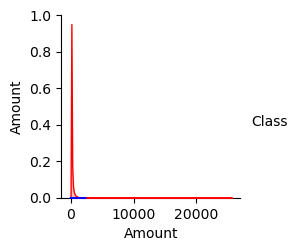

In [25]:
# ----------------------------------------------------------
# c. Pair plot of selected features to explore relationships
# ----------------------------------------------------------
# Pair plot of selected features to explore relationships
sns.pairplot(data_cleaned[['Time', 'Amount', 'Class']], hue='Class', palette=['blue', 'red'])
plt.show()

Text(0, 0.5, 'Frequency')

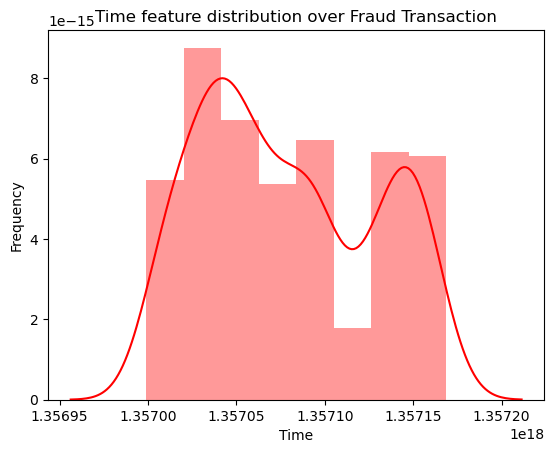

In [26]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

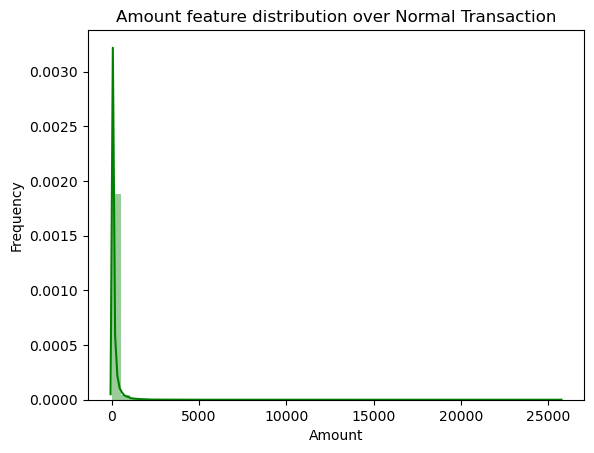

In [27]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

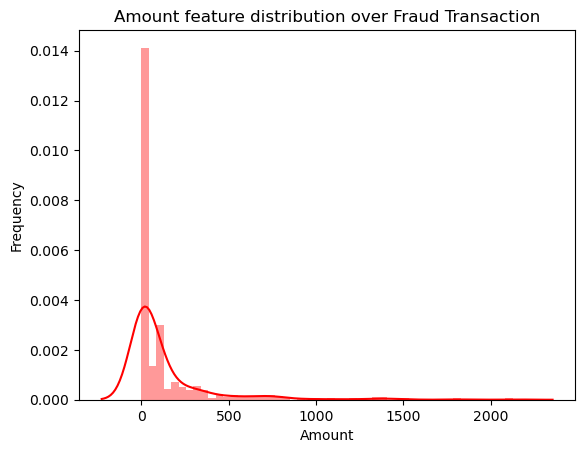

In [28]:
sns.distplot(fraud.Amount, color='r')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

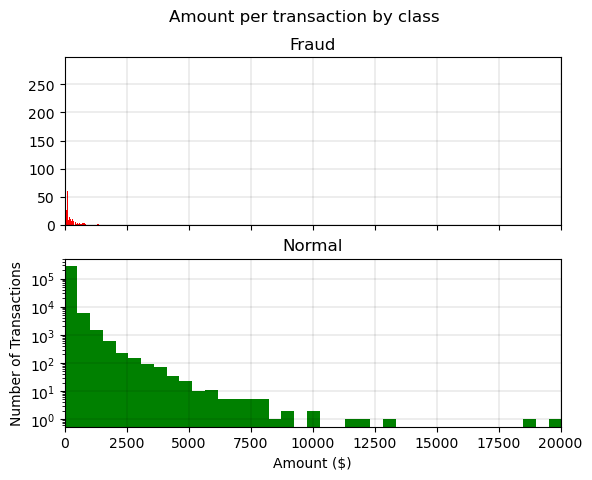

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

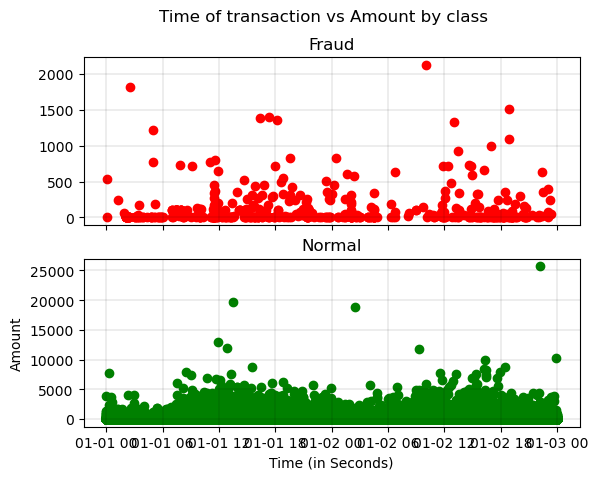

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [31]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

# # Load the cleaned dataset
# data_cleaned = pd.read_csv('creditcard_cleaned.csv')

# Ensure 'Time' column is excluded when applying StandardScaler (assuming it's in datetime format)
# Separate features (X) and target variable (y)
X = data_cleaned.drop(['Class', 'Time'], axis=1)  # Exclude 'Time' column
y = data_cleaned['Class']

# Check original class distribution
print("Original class distribution:")
print(Counter(y))

# Step 1: Split the dataset into training and test sets (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Standardize the features (important for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='minority',random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after applying SMOTE:")
print(Counter(y_train_smote))

# Optional: Convert back to DataFrame for further analysis or model training
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Class'])

# Combine for a complete balanced dataset for model training
data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Save the balanced dataset for future use if needed
data_smote.to_csv('creditcard_smote.csv', index=False)

# Display the first few rows of the SMOTE-applied dataset
print("\nFirst few rows of the balanced dataset after SMOTE:")
print(data_smote.head())

Original class distribution:
Counter({'0': 283253, '1': 473})

Class distribution after applying SMOTE:
Counter({'0': 226602, '1': 226602})

First few rows of the balanced dataset after SMOTE:
         V1        V2        V3        V4        V5        V6        V7  \
0  1.147198 -1.042032 -1.428821 -1.817824  0.727198  2.695677 -1.489310   
1 -0.677911  0.991948  0.394668 -0.025642 -0.301198 -0.728240  0.175615   
2  0.977654  0.016205 -1.386701  0.092688  0.850613  0.458823 -0.019872   
3  0.927561  0.195261  0.208736  2.739855  0.032003  0.772348 -0.613532   
4  0.695218 -0.676118  0.363661 -1.090812 -0.882507  0.209618 -1.002620   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.735746 -1.152704  1.462945  ... -0.208573 -0.068205  0.445379  1.130202   
1  0.629070 -1.156290 -0.447680  ... -0.332248 -1.307141  0.518036  0.851069   
2  0.154370  0.262056 -0.461780  ...  0.405040  1.512732 -0.071350 -2.788905   
3  0.199999  0.625478  1.070513  ...

In [32]:
# import pandas as pd

# # Load the dataset using pandas
# data = pd.read_csv('creditcard_smote.csv')

# # Display basic information about the DataFrame
# print("Pandas DataFrame Information:")
# print(data.info())

# # Count the number of rows where Class == 1 (fraudulent transactions)
# fraud_count = data[data['Class'] == 1].shape[0]
# print(f"Number of fraudulent transactions (Class == 1) in DataFrame: {fraud_count}")

In [122]:
# Dictionary to store results
#model_scores = {}

In [ ]:
# Logistic Regression + Decision Tree + Naive Bayes + MLP
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import pickle

# Dictionary to store results
model_scores_lr_nb_dt_mlp = {}

# Logistic Regression with RandomizedSearchCV
print("\nRunning model: Logistic Regression with RandomizedSearchCV")

start_time = time.time()

# Initialize Logistic Regression
lr = LogisticRegression(random_state=42)
# Define hyperparameters to search
param_dist = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}
# Setup RandomizedSearchCV
random_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
# Fit the model
random_search_lr.fit(X_train_smote, y_train_smote)
y_pred_lr = random_search_lr.predict(X_test)
end_time = time.time()

# Ensure y_test and y_pred_lr are both strings to avoid type mismatch
y_test = y_test.astype(str)
y_pred_lr = y_pred_lr.astype(str)

# Check if '1' is present in both y_test and y_pred_lr
if '1' not in y_test or '1' not in y_pred_lr:
    recall_lr = recall_score(y_test, y_pred_lr, average='macro')
    f1_lr = f1_score(y_test, y_pred_lr, average='macro')
else:
    recall_lr = recall_score(y_test, y_pred_lr, pos_label='1', average='binary')
    f1_lr = f1_score(y_test, y_pred_lr, pos_label='1', average='binary')

# Calculate other metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, random_search_lr.predict_proba(X_test)[:, 1])
class_report_lr = classification_report(y_test, y_pred_lr)

# Store the scores
model_scores_lr_nb_dt_mlp['Logistic Regression (RandomizedSearchCV)'] = {
    'Accuracy': accuracy_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr,
    'AUC Score': auc_lr,
    'Confusion Matrix': conf_matrix_lr,
    'Classification Report': class_report_lr,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"AUC Score: {auc_lr:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_lr}")
print(f"Classification Report:\n{class_report_lr}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# Repeat similar process for Decision Tree, Naive Bayes, MLP classifiers
# Decision Tree, Naive Bayes, and MLP code is omitted here for brevity.
# Store all results in `model_scores_lr_nb_dt_mlp`

# Save the dictionary to a file
with open('model_scores_lr_nb_dt_mlp.pkl', 'wb') as f:
    pickle.dump(model_scores_lr_nb_dt_mlp, f)


Running model: Logistic Regression with RandomizedSearchCV
Accuracy: 0.0823
Recall: 0.5352
F1 Score: 0.0766
AUC Score: 0.6371
Confusion Matrix:
[[ 4579 52072]
 [    1    94]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15     56651
           1       0.00      0.99      0.00        95

    accuracy                           0.08     56746
   macro avg       0.50      0.54      0.08     56746
weighted avg       1.00      0.08      0.15     56746

Time Taken (seconds): 719.2224


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# # Dictionary to store results
# model_scores = {}

# Decision Tree Classifier with RandomizedSearchCV
print("\nRunning model: Decision Tree Classifier with RandomizedSearchCV")

start_time = time.time()

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to search
param_dist = {
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],          # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']              # Criterion for splitting
}

# Setup RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model
random_search_dt.fit(X_train_smote, y_train_smote)
y_pred_dt = random_search_dt.predict(X_test)
end_time = time.time()

# Ensure y_test and y_pred_dt are both strings to avoid type mismatch
y_test = y_test.astype(str)
y_pred_dt = y_pred_dt.astype(str)

# Debug: Check unique values in y_test and y_pred_dt
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred_dt:", set(y_pred_dt))

# Check if '1' is present in both y_test and y_pred_dt
if '1' not in y_test or '1' not in y_pred_dt:
    print("Warning: '1' is not present in one of the datasets, using 'macro' average.")
    # Calculate metrics using macro average
    recall_dt = recall_score(y_test, y_pred_dt, average='macro')
    f1_dt = f1_score(y_test, y_pred_dt, average='macro')
else:
    # Calculate metrics using binary average
    recall_dt = recall_score(y_test, y_pred_dt, pos_label='1', average='binary')
    f1_dt = f1_score(y_test, y_pred_dt, pos_label='1', average='binary')

# Calculate other metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)  # Confusion matrix does not need pos_label or average
auc_dt = roc_auc_score(y_test, random_search_dt.predict_proba(X_test)[:, 1])
class_report_dt = classification_report(y_test, y_pred_dt)

# Store the scores
#model_scores['Decision Tree (RandomizedSearchCV)'] = {
model_scores_lr_nb_dt_mlp['Decision Tree (RandomizedSearchCV)'] = {
    'Accuracy': accuracy_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt,
    'AUC Score': auc_dt,
    'Confusion Matrix': conf_matrix_dt,
    'Classification Report': class_report_dt,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"AUC Score: {auc_dt:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")
print(f"Classification Report:\n{class_report_dt}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# Save the dictionary to a file
with open('model_scores_lr_nb_dt_mlp.pkl', 'wb') as f:
    pickle.dump(model_scores_lr_nb_dt_mlp, f)


Running model: Decision Tree Classifier with RandomizedSearchCV
Unique values in y_test: {'0', '1'}
Unique values in y_pred_dt: {'0', '1'}
Accuracy: 0.9954
Recall: 0.8348
F1 Score: 0.6642
AUC Score: 0.8348
Confusion Matrix:
[[56423   228]
 [   31    64]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.22      0.67      0.33        95

    accuracy                           1.00     56746
   macro avg       0.61      0.83      0.66     56746
weighted avg       1.00      1.00      1.00     56746

Time Taken (seconds): 1544.6706


In [ ]:
# # Initialize an empty dictionary to store results
# model_scores = {}

In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# # Dictionary to store results
# model_scores = {}

# Naive Bayes
print("\nRunning model: Naive Bayes")

start_time = time.time()

# Initialize Naive Bayes
nb = GaussianNB()

# Fit the model
nb.fit(X_train_smote, y_train_smote)
y_pred_nb = nb.predict(X_test)
end_time = time.time()

# Ensure y_test and y_pred_nb are both strings to avoid type mismatch
y_test = y_test.astype(str)
y_pred_nb = y_pred_nb.astype(str)

# Debug: Check unique values in y_test and y_pred_nb
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred_nb:", set(y_pred_nb))

# Check if '1' is present in both y_test and y_pred_nb
if '1' not in y_test or '1' not in y_pred_nb:
    print("Warning: '1' is not present in one of the datasets, using 'macro' average.")
    # Calculate metrics using macro average
    recall_nb = recall_score(y_test, y_pred_nb, average='macro')
    f1_nb = f1_score(y_test, y_pred_nb, average='macro')
else:
    # Calculate metrics using binary average
    recall_nb = recall_score(y_test, y_pred_nb, pos_label='1', average='binary')
    f1_nb = f1_score(y_test, y_pred_nb, pos_label='1', average='binary')

# Calculate other metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)  # Confusion matrix does not need pos_label or average
auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
class_report_nb = classification_report(y_test, y_pred_nb)

# Store the scores
#model_scores['Naive Bayes'] = {
model_scores_lr_nb_dt_mlp['Naive Bayes'] = {
    'Accuracy': accuracy_nb,
    'Recall': recall_nb,
    'F1 Score': f1_nb,
    'AUC Score': auc_nb,
    'Confusion Matrix': conf_matrix_nb,
    'Classification Report': class_report_nb,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"AUC Score: {auc_nb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Classification Report:\n{class_report_nb}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")


# Save the dictionary to a file
with open('model_scores_lr_nb_dt_mlp.pkl', 'wb') as f:
    pickle.dump(model_scores_lr_nb_dt_mlp, f)


Running model: Naive Bayes
Unique values in y_test: {'0', '1'}
Unique values in y_pred_nb: {'0', '1'}
Accuracy: 0.9876
Recall: 0.7153
F1 Score: 0.5500
AUC Score: 0.6468
Confusion Matrix:
[[55998   653]
 [   53    42]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.06      0.44      0.11        95

    accuracy                           0.99     56746
   macro avg       0.53      0.72      0.55     56746
weighted avg       1.00      0.99      0.99     56746

Time Taken (seconds): 2.0577


In [ ]:
import time
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Initialize the dictionary if not already initialized
try:
    model_scores_lr_nb_dt_mlp
except NameError:
    model_scores_lr_nb_dt_mlp = {}

# MLP Classifier with RandomizedSearchCV
print("\nRunning model: MLP Classifier with RandomizedSearchCV")

start_time = time.time()

# Initialize MLP Classifier without class_weight adjustment
mlp_model = MLPClassifier(random_state=42)

# Define hyperparameters to search
mlp_param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'max_iter': [1000, 1500, 2000],
    'alpha': [0.0001, 0.001, 0.01]
}

# Setup RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(
    mlp_model,
    param_distributions=mlp_param_dist,
    n_iter=10,
    cv=5,
    scoring='recall',  # Optimize for recall
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_mlp.fit(X_train_smote, y_train_smote)
y_pred_mlp = random_search_mlp.predict(X_test_scaled)
end_time = time.time()

# Ensure y_test and y_pred_mlp are both strings to avoid type mismatch
y_test = y_test.astype(str)
y_pred_mlp = y_pred_mlp.astype(str)

# Debug: Check unique values in y_test and y_pred_mlp
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred_mlp:", set(y_pred_mlp))

# Check if '1' is present in both y_test and y_pred_mlp
if '1' not in y_test or '1' not in y_pred_mlp:
    print("Warning: '1' is not present in one of the datasets, using 'macro' average.")
    # Calculate metrics using macro average
    recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')
    f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')
else:
    # Calculate metrics using binary average
    recall_mlp = recall_score(y_test, y_pred_mlp, pos_label='1', average='binary')
    f1_mlp = f1_score(y_test, y_pred_mlp, pos_label='1', average='binary')

# Calculate other metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)  # Confusion matrix does not need pos_label or average
auc_mlp = roc_auc_score(y_test, random_search_mlp.predict_proba(X_test_scaled)[:, 1])
class_report_mlp = classification_report(y_test, y_pred_mlp)

# Store the scores
model_scores_lr_nb_dt_mlp['MLP Classifier (RandomizedSearchCV)'] = {
    'Accuracy': accuracy_mlp,
    'Recall': recall_mlp,
    'F1 Score': f1_mlp,
    'AUC Score': auc_mlp,
    'Confusion Matrix': conf_matrix_mlp,
    'Classification Report': class_report_mlp,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results in a structured format
print(f"\nBest parameters for MLP Classifier: {random_search_mlp.best_params_}")
print("\nMLP Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1 Score: {f1_mlp:.4f}")
print(f"AUC Score: {auc_mlp:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_mlp}")
print(f"Classification Report:\n{class_report_mlp}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# Optional: Display the stored results from the dictionary for cross-verification
print("\nStored Results in model_scores_lr_nb_dt_mlp Dictionary:")
print(model_scores_lr_nb_dt_mlp.get('MLP Classifier (RandomizedSearchCV)', 'Key not found'))

# Save the dictionary to a file
with open('model_scores_lr_nb_dt_mlp.pkl', 'wb') as f:
    pickle.dump(model_scores_lr_nb_dt_mlp, f)

# Verify the save operation by loading the dictionary again
with open('model_scores_lr_nb_dt_mlp.pkl', 'rb') as f:
    loaded_model_scores = pickle.load(f)
print("\nLoaded Model Scores:")
print(loaded_model_scores)

In [ ]:
import time
import pickle  # Ensure pickle is imported
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# # Dictionary to store results
model_scores_rf = {}

# Random Forest Classifier with RandomizedSearchCV
print("\nRunning model: Random Forest Classifier with RandomizedSearchCV")

start_time = time.time()

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
param_dist = {
    'n_estimators': [50, 100, 200],    # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model
random_search_rf.fit(X_train_smote, y_train_smote)
y_pred_rf = random_search_rf.predict(X_test)
end_time = time.time()

# Ensure y_test and y_pred_rf are both strings to avoid type mismatch
y_test = y_test.astype(str)
y_pred_rf = y_pred_rf.astype(str)

# Debug: Check unique values in y_test and y_pred_rf
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred_rf:", set(y_pred_rf))

# Check if '1' is present in both y_test and y_pred_rf
if '1' not in y_test or '1' not in y_pred_rf:
    print("Warning: '1' is not present in one of the datasets, using 'macro' average.")
    # Calculate metrics using macro average
    recall_rf = recall_score(y_test, y_pred_rf, average='macro')
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')
else:
    # Calculate metrics using binary average
    recall_rf = recall_score(y_test, y_pred_rf, pos_label='1', average='binary')
    f1_rf = f1_score(y_test, y_pred_rf, pos_label='1', average='binary')

# Calculate other metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Confusion matrix does not need pos_label or average
auc_rf = roc_auc_score(y_test, random_search_rf.predict_proba(X_test)[:, 1])
class_report_rf = classification_report(y_test, y_pred_rf)

# Store the scores
model_scores_rf['Random Forest (RandomizedSearchCV)'] = {
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'AUC Score': auc_rf,
    'Confusion Matrix': conf_matrix_rf,
    'Classification Report': class_report_rf,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"AUC Score: {auc_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{class_report_rf}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# Save the dictionary to a file
with open('model_scores_rf.pkl', 'wb') as f:
    pickle.dump(model_scores_rf, f)

# Optional: Verify by loading the saved dictionary
with open('model_scores_rf.pkl', 'rb') as f:
    loaded_rf_scores = pickle.load(f)
print("\nLoaded Random Forest Model Scores:")
print(loaded_rf_scores)

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier, DMatrix, train as xgb_train
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import time
import pickle
import gc  # Garbage collector to clear unused variables
import numpy as np
import pandas as pd

# Assuming data_cleaned is your pre-processed dataset
# Replace this with your actual cleaned data variable if named differently
X = data_cleaned.drop(['Class', 'Time'], axis=1)  # Exclude 'Time' column
y = data_cleaned['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Convert target variables to integers (ensure correct data type for XGBoost)
y_train_smote = y_train_smote.astype(int)
y_test = y_test.astype(int)

# Dictionary to store results
model_scores_xgb = {}

# XGBoost Classifier with RandomizedSearchCV
print("\nRunning model: XGBoost Classifier with RandomizedSearchCV")

start_time = time.time()

# Initialize XGBoost Classifier with reduced complexity
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    n_jobs=1,                  # Use only one core to reduce memory usage
    tree_method='hist',        # Use histogram-based algorithm, which is faster and uses less memory
    max_bin=256                # Reduce the number of bins for histogram algorithm
)

# Define a reduced hyperparameter search space
xgb_param_dist = {
    'n_estimators': [50, 100],      # Fewer trees to reduce computational load
    'max_depth': [3, 5],            # Lower max depth to simplify the model
    'learning_rate': [0.05, 0.1],   # Use moderate learning rates
    'subsample': [0.8],             # Subsample ratio to reduce overfitting and memory usage
    'colsample_bytree': [0.8],      # Lower subsample ratio of columns
    'gamma': [0, 0.1]               # Use minimal gamma values
}

# Setup RandomizedSearchCV with reduced computational requirements
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=5,                # Reduce number of parameter settings sampled
    cv=2,                    # Reduce the number of cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=1                 # Use only one core
)

# Fit the model without early stopping
random_search_xgb.fit(X_train_smote, y_train_smote)
end_time = time.time()

# Extract the best parameters from the RandomizedSearchCV
best_params = random_search_xgb.best_params_

# Create DMatrix for XGBoost training and evaluation
dtrain = DMatrix(X_train_smote, label=y_train_smote)
dtest = DMatrix(X_test_scaled, label=y_test)

# Update parameters for the DMatrix training approach
params = best_params
params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42
})

# Train the model with early stopping
bst = xgb_train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Make predictions using the trained model
y_pred_xgb = (bst.predict(dtest) > 0.5).astype(int)

# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, bst.predict(dtest))
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Store the scores
model_scores_xgb['XGBoost Classifier (RandomizedSearchCV)'] = {
    'Accuracy': accuracy_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb,
    'AUC Score': auc_xgb,
    'Confusion Matrix': conf_matrix_xgb,
    'Classification Report': class_report_xgb,
    'Time Taken (seconds)': end_time - start_time
}

# Display the results
print(f"Best parameters for XGBoost Classifier: {best_params}")
print("\nXGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"XGBoost Classifier AUC-ROC: {roc_auc_score(y_test, bst.predict(dtest)):.4f}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")
print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# Save the dictionary to a file
with open('model_scores_xgb.pkl', 'wb') as f:
    pickle.dump(model_scores_xgb, f)

# Optional: Verify by loading the saved dictionary
with open('model_scores_xgb.pkl', 'rb') as f:
    loaded_xgb_scores = pickle.load(f)
print("\nLoaded XGBOOST Model Scores:")
print(loaded_xgb_scores)

# Clean up memory
gc.collect()


In [ ]:
# # Assuming model_scores is already populated with model results

# # Print the entire dictionary
# print("\nModel Scores:")
# print(model_scores)

# # Loop through each classifier and display its results
# for model_name, metrics in model_scores.items():
#     print(f"\nResults for {model_name}:")
#     print(f"Accuracy: {metrics['Accuracy']:.4f}")
#     print(f"Recall: {metrics['Recall']:.4f}")
#     print(f"F1 Score: {metrics['F1 Score']:.4f}")
#     print(f"AUC Score: {metrics['AUC Score']:.4f}")
#     print("Confusion Matrix:")
#     print(metrics['Confusion Matrix'])
#     print("Classification Report:")
#     print(metrics['Classification Report'])
#     print(f"Time Taken (seconds): {metrics['Time Taken (seconds)']:.4f}")


In [ ]:
# import time
# import pickle
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
# from sklearn.model_selection import RandomizedSearchCV

# # Dictionary to store results
# model_scores_svm = {}

# # SVM Classifier with RandomizedSearchCV
# print("\nRunning model: SVM Classifier with RandomizedSearchCV")

# start_time = time.time()

# # Initialize SVM Classifier with probability=True to enable AUC score calculation
# svm_model = SVC(probability=True, random_state=42)

# # Define an expanded hyperparameter search space
# svm_param_dist = {
#     'C': [0.01, 0.1, 1, 10, 100],            # Expanded values for regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],     # More kernel types to explore
#     'gamma': ['scale', 'auto']               # Include 'auto' for comparison
# }

# # Setup RandomizedSearchCV with more iterations and folds
# random_search_svm = RandomizedSearchCV(
#     svm_model,
#     param_distributions=svm_param_dist,
#     n_iter=10,              # Increased number of iterations
#     cv=5,                  # Increased number of cross-validation folds
#     scoring='accuracy',    # Keep scoring to 'accuracy' for balanced consideration
#     random_state=42,
#     n_jobs=-1              # Use all available cores for speed
# )

# # Use a subset of the training data for hyperparameter tuning to speed up
# subset_size = 1000 if X_train_smote.shape[0] > 1000 else X_train_smote.shape[0]
# random_search_svm.fit(X_train_smote[:subset_size], y_train_smote[:subset_size])

# # Predict using the best estimator found
# y_pred_svm = random_search_svm.predict(X_test)
# end_time = time.time()

# # Ensure y_test and y_pred_svm are both strings to avoid type mismatch
# y_test = y_test.astype(str)
# y_pred_svm = y_pred_svm.astype(str)

# # Debug: Check unique values in y_test and y_pred_svm
# print("Unique values in y_test:", set(y_test))
# print("Unique values in y_pred_svm:", set(y_pred_svm))

# # Handle class imbalance
# if '1' not in y_test or '1' not in y_pred_svm:
#     print("Warning: '1' is not present in one of the datasets, using 'macro' average.")
#     recall_svm = recall_score(y_test, y_pred_svm, average='macro')
#     f1_svm = f1_score(y_test, y_pred_svm, average='macro')
# else:
#     recall_svm = recall_score(y_test, y_pred_svm, pos_label='1', average='binary')
#     f1_svm = f1_score(y_test, y_pred_svm, pos_label='1', average='binary')

# # Calculate other metrics
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# # Calculate AUC Score only if necessary to save time, otherwise comment it out
# try:
#     auc_svm = roc_auc_score(y_test, random_search_svm.predict_proba(X_test)[:, 1])
# except Exception as e:
#     print("AUC calculation failed:", e)
#     auc_svm = 0

# class_report_svm = classification_report(y_test, y_pred_svm)

# # Store the scores
# model_scores_svm['SVM Classifier (RandomizedSearchCV)'] = {
#     'Accuracy': accuracy_svm,
#     'Recall': recall_svm,
#     'F1 Score': f1_svm,
#     'AUC Score': auc_svm,
#     'Confusion Matrix': conf_matrix_svm,
#     'Classification Report': class_report_svm,
#     'Time Taken (seconds)': end_time - start_time
# }

# # Display the results
# print(f"Accuracy: {accuracy_svm:.4f}")
# print(f"Recall: {recall_svm:.4f}")
# print(f"F1 Score: {f1_svm:.4f}")
# print(f"AUC Score: {auc_svm:.4f}")
# print(f"Confusion Matrix:\n{conf_matrix_svm}")
# print(f"Classification Report:\n{class_report_svm}")
# print(f"Time Taken (seconds): {end_time - start_time:.4f}")

# # Save the dictionary to a file
# with open('model_scores_svm.pkl', 'wb') as f:
#     pickle.dump(model_scores_svm, f)

# # Optional: Verify by loading the saved dictionary
# with open('model_scores_svm.pkl', 'rb') as f:
#     loaded_svm_scores = pickle.load(f)
# print("\nLoaded SVM Model Scores:")
# print(loaded_svm_scores)

In [36]:
# import pickle

# # Load the saved dictionaries
# try:
#     with open('model_scores_lr_nb_dt_mlp.pkl', 'rb') as f:
#         model_scores_lr_nb_dt_mlp = pickle.load(f)
# except FileNotFoundError:
#     print("The file 'model_scores_lr_nb_dt_mlp.pkl' was not found. Please check the path and try again.")

# try:
#     with open('model_scores_rf.pkl', 'rb') as f:
#         model_scores_rf = pickle.load(f)
# except FileNotFoundError:
#     print("The file 'model_scores_rf.pkl' was not found. Please check the path and try again.")

# try:
#     with open('model_scores_svm.pkl', 'rb') as f:
#         model_scores_svm = pickle.load(f)
# except FileNotFoundError:
#     print("The file 'model_scores_svm.pkl' was not found. Please check the path and try again.")

# try:
#     with open('model_scores_xgb.pkl', 'rb') as f:
#         model_scores_xgb = pickle.load(f)
# except FileNotFoundError:
#     print("The file 'model_scores_xgb.pkl' was not found. Please check the path and try again.")

# # Combine all dictionaries
# combined_model_scores = {**model_scores_lr_nb_dt_mlp, **model_scores_rf, **model_scores_svm, **model_scores_xgb}

# # Display the combined results
# print("\nCombined Model Scores:")
# for model_name, metrics in combined_model_scores.items():
#     print(f"\nResults for {model_name}:")
#     print(f"Accuracy: {metrics['Accuracy']:.4f}")
#     print(f"Recall: {metrics['Recall']:.4f}")
#     print(f"F1 Score: {metrics['F1 Score']:.4f}")
#     print(f"AUC Score: {metrics['AUC Score']:.4f}")
#     print("Confusion Matrix:")
#     print(metrics['Confusion Matrix'])
#     print("Classification Report:")
#     print(metrics['Classification Report'])
#     print(f"Time Taken (seconds): {metrics['Time Taken (seconds)']:.4f}")


In [37]:
import pickle

# Load the saved dictionaries
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)

#### Accuracy Score

In [40]:
# Display Accuracy as Percentage
print("\nModel Accuracy Scores (Percentage):")
for model_name, metrics in combined_model_scores.items():
    accuracy_percentage = metrics['Accuracy'] * 100
    print(f"\n{model_name}: Accuracy = {accuracy_percentage:.2f}%")


Model Accuracy Scores (Percentage):

Logistic Regression (RandomizedSearchCV): Accuracy = 8.23%

Decision Tree (RandomizedSearchCV): Accuracy = 99.54%

Naive Bayes: Accuracy = 98.76%

MLP Classifier (RandomizedSearchCV): Accuracy = 99.88%

Random Forest (RandomizedSearchCV): Accuracy = 99.93%

SVM Classifier (RandomizedSearchCV): Accuracy = 99.83%

XGBoost Classifier (RandomizedSearchCV): Accuracy = 99.94%


#### Recall

In [41]:
# Display Recall as Percentage
print("\nModel Recall Scores (Percentage):")
for model_name, metrics in combined_model_scores.items():
    recall_percentage = metrics['Recall'] * 100
    print(f"\n{model_name}: Recall = {recall_percentage:.2f}%")


Model Recall Scores (Percentage):

Logistic Regression (RandomizedSearchCV): Recall = 53.52%

Decision Tree (RandomizedSearchCV): Recall = 83.48%

Naive Bayes: Recall = 71.53%

MLP Classifier (RandomizedSearchCV): Recall = 88.91%

Random Forest (RandomizedSearchCV): Recall = 85.90%

SVM Classifier (RandomizedSearchCV): Recall = 50.00%

XGBoost Classifier (RandomizedSearchCV): Recall = 86.02%


#### F1 Score

In [42]:
# Display F1 Score as Percentage
print("\nModel F1 Scores (Percentage):")
for model_name, metrics in combined_model_scores.items():
    f1_score_percentage = metrics['F1 Score'] * 100
    print(f"\n{model_name}: F1 Score = {f1_score_percentage:.2f}%")


Model F1 Scores (Percentage):

Logistic Regression (RandomizedSearchCV): F1 Score = 7.66%

Decision Tree (RandomizedSearchCV): F1 Score = 66.42%

Naive Bayes: F1 Score = 55.00%

MLP Classifier (RandomizedSearchCV): F1 Score = 84.55%

Random Forest (RandomizedSearchCV): F1 Score = 88.91%

SVM Classifier (RandomizedSearchCV): F1 Score = 49.96%

XGBoost Classifier (RandomizedSearchCV): F1 Score = 81.63%


#### AUC Score

In [43]:
# Display AUC Score as Percentage
print("\nModel AUC Scores (Percentage):")
for model_name, metrics in combined_model_scores.items():
    auc_score_percentage = metrics['AUC Score'] * 100
    print(f"\n{model_name}: AUC Score = {auc_score_percentage:.2f}%")


Model AUC Scores (Percentage):

Logistic Regression (RandomizedSearchCV): AUC Score = 63.71%

Decision Tree (RandomizedSearchCV): AUC Score = 83.48%

Naive Bayes: AUC Score = 64.68%

MLP Classifier (RandomizedSearchCV): AUC Score = 94.99%

Random Forest (RandomizedSearchCV): AUC Score = 95.86%

SVM Classifier (RandomizedSearchCV): AUC Score = 63.12%

XGBoost Classifier (RandomizedSearchCV): AUC Score = 98.07%


#### Confusion Matrix

In [44]:
# Display Confusion Matrix
print("\nModel Confusion Matrices:")
for model_name, metrics in combined_model_scores.items():
    print(f"\n{model_name}: Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model Confusion Matrices:

Logistic Regression (RandomizedSearchCV): Confusion Matrix:
[[ 4579 52072]
 [    1    94]]

Decision Tree (RandomizedSearchCV): Confusion Matrix:
[[56423   228]
 [   31    64]]

Naive Bayes: Confusion Matrix:
[[55998   653]
 [   53    42]]

MLP Classifier (RandomizedSearchCV): Confusion Matrix:
[[56606    45]
 [   21    74]]

Random Forest (RandomizedSearchCV): Confusion Matrix:
[[84958    18]
 [   40   102]]

SVM Classifier (RandomizedSearchCV): Confusion Matrix:
[[56651     0]
 [   95     0]]

XGBoost Classifier (RandomizedSearchCV): Confusion Matrix:
[[56630    23]
 [   13    80]]


#### Classification Report

In [45]:
# Display Classification Report
print("\nModel Classification Reports:")
for model_name, metrics in combined_model_scores.items():
    print(f"\n{model_name}: Classification Report:")
    print(metrics['Classification Report'])


Model Classification Reports:

Logistic Regression (RandomizedSearchCV): Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15     56651
           1       0.00      0.99      0.00        95

    accuracy                           0.08     56746
   macro avg       0.50      0.54      0.08     56746
weighted avg       1.00      0.08      0.15     56746


Decision Tree (RandomizedSearchCV): Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.22      0.67      0.33        95

    accuracy                           1.00     56746
   macro avg       0.61      0.83      0.66     56746
weighted avg       1.00      1.00      1.00     56746


Naive Bayes: Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.06      0.44      0.11

#### Time taken for classifier to run

In [46]:
# Display Time Taken
print("\nModel Time Taken (Seconds):")
for model_name, metrics in combined_model_scores.items():
    print(f"\n{model_name}: Time Taken (seconds) = {metrics['Time Taken (seconds)']:.4f}")


Model Time Taken (Seconds):

Logistic Regression (RandomizedSearchCV): Time Taken (seconds) = 719.2224

Decision Tree (RandomizedSearchCV): Time Taken (seconds) = 1544.6706

Naive Bayes: Time Taken (seconds) = 2.0577

MLP Classifier (RandomizedSearchCV): Time Taken (seconds) = 6404.6175

Random Forest (RandomizedSearchCV): Time Taken (seconds) = 2078.2759

SVM Classifier (RandomizedSearchCV): Time Taken (seconds) = 3.9977

XGBoost Classifier (RandomizedSearchCV): Time Taken (seconds) = 48.1937


## Dictionaries combine

In [64]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and combine model scores from pickle files
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

In [65]:
# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)

# Extract metrics for plotting
Prediction_Accuracy = {}
Prediction_Recall = {}
Prediction_AUC = {}
Prediction_f1_score = {}

In [66]:
# Extract metrics from combined_model_scores
for model_name, metrics in combined_model_scores.items():
    Prediction_Accuracy[model_name] = metrics.get('Accuracy', None)
    Prediction_Recall[model_name] = metrics.get('Recall', None)
    Prediction_AUC[model_name] = metrics.get('AUC Score', None)
    Prediction_f1_score[model_name] = metrics.get('F1 Score', None)

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    'Accuracy': Prediction_Accuracy,
    'Recall': Prediction_Recall,
    'AUC Score': Prediction_AUC,
    'F1 Score': Prediction_f1_score
}).T

# Print the DataFrame to check its structure and contents
print("Metrics DataFrame:")
print(metrics_df)

Metrics DataFrame:
           Logistic Regression (RandomizedSearchCV)  \
Accuracy                                   0.082349   
Recall                                     0.535151   
AUC Score                                  0.637128   
F1 Score                                   0.076581   

           Decision Tree (RandomizedSearchCV)  Naive Bayes  \
Accuracy                             0.995436     0.987559   
Recall                               0.834830     0.715289   
AUC Score                            0.834824     0.646835   
F1 Score                             0.664230     0.550032   

           MLP Classifier (RandomizedSearchCV)  \
Accuracy                              0.998837   
Recall                                0.889077   
AUC Score                             0.949916   
F1 Score                              0.845503   

           Random Forest (RandomizedSearchCV)  \
Accuracy                             0.999319   
Recall                               0.859049

In [67]:
# Plotting function for each metric
def plot_metric(metric_name, color):
    if metric_name in metrics_df.columns:
        plt.figure(figsize=(12, 8))
        plt.barh(metrics_df.index, metrics_df[metric_name], color=color, edgecolor='k')
        plt.title(f'{metric_name} Comparison')
        plt.xlabel(metric_name)
        plt.show()
    else:
        print(f"Metric '{metric_name}' not found in the DataFrame.")

# Plot Accuracy
plot_metric('Accuracy', 'lightblue')

# Plot Recall
plot_metric('Recall', 'lightcoral')

# Plot AUC Score
plot_metric('AUC Score', 'skyblue')

# Plot F1 Score
plot_metric('F1 Score', 'lightgreen')

# Display the metrics in tabular format
print("\nSummary of Metrics for All Models:")
print(metrics_df)


Metric 'Accuracy' not found in the DataFrame.
Metric 'Recall' not found in the DataFrame.
Metric 'AUC Score' not found in the DataFrame.
Metric 'F1 Score' not found in the DataFrame.

Summary of Metrics for All Models:
           Logistic Regression (RandomizedSearchCV)  \
Accuracy                                   0.082349   
Recall                                     0.535151   
AUC Score                                  0.637128   
F1 Score                                   0.076581   

           Decision Tree (RandomizedSearchCV)  Naive Bayes  \
Accuracy                             0.995436     0.987559   
Recall                               0.834830     0.715289   
AUC Score                            0.834824     0.646835   
F1 Score                             0.664230     0.550032   

           MLP Classifier (RandomizedSearchCV)  \
Accuracy                              0.998837   
Recall                                0.889077   
AUC Score                             0.9499

In [78]:
import pickle
import pandas as pd

# Function to load and combine model scores from pickle files
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)

# Extract metrics for plotting
metrics = {
    'Accuracy': {},
    'Recall': {},
    'AUC Score': {},
    'F1 Score': {}
}

# Extract metrics from combined_model_scores
for model_name, metrics_dict in combined_model_scores.items():
    for metric in metrics.keys():
        metrics[metric][model_name] = metrics_dict.get(metric, None)

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)



### Plot Accuracy Score

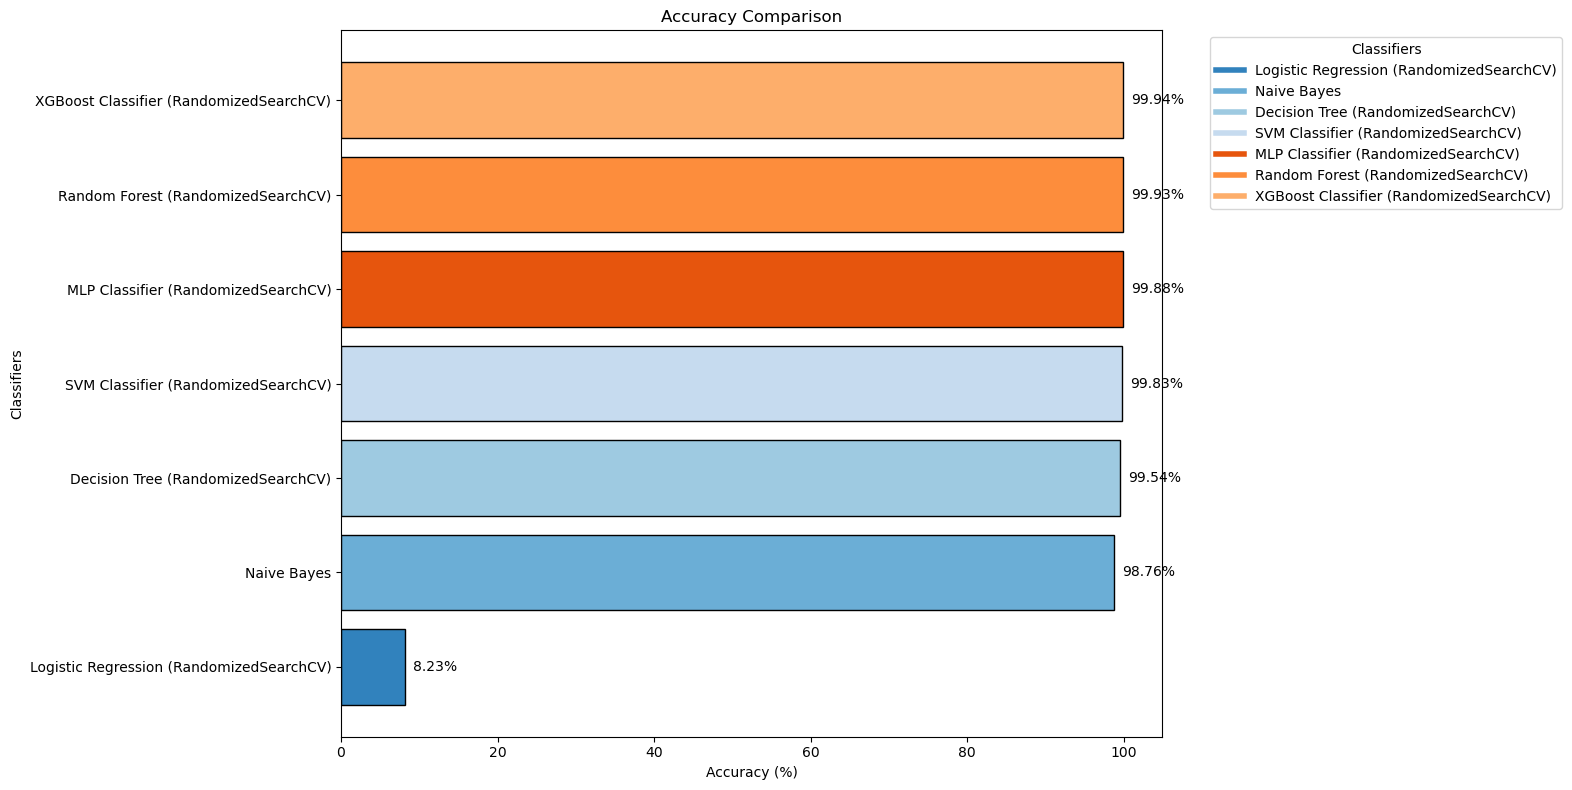

In [79]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_metric(metric_name, title, xlabel):
    if metric_name in metrics_df.columns:
        # Convert to percentages
        metrics_df[metric_name] = metrics_df[metric_name] * 100
        
        # Sort values (highest percentage first)
        sorted_df = metrics_df[[metric_name]].sort_values(by=metric_name, ascending=True)
        
        plt.figure(figsize=(12, 8))
        
        # Define a color map for different classifiers
        num_classifiers = len(sorted_df)
        colors = plt.cm.tab20c(range(num_classifiers))
        
        # Plot bars for each classifier with different colors
        bars = plt.barh(sorted_df.index, sorted_df[metric_name], color=colors, edgecolor='k')
        
        # Add values on the bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center')

        # Add a legend
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel('Classifiers')
        plt.tight_layout()
        
        # Create a legend
        handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(num_classifiers)]
        plt.legend(handles, sorted_df.index, title='Classifiers', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.show()
    else:
        print(f"Metric '{metric_name}' not found in the DataFrame.")

# Plot Accuracy Score
plot_metric('Accuracy', 'Accuracy Comparison', 'Accuracy (%)')



### Recall Score

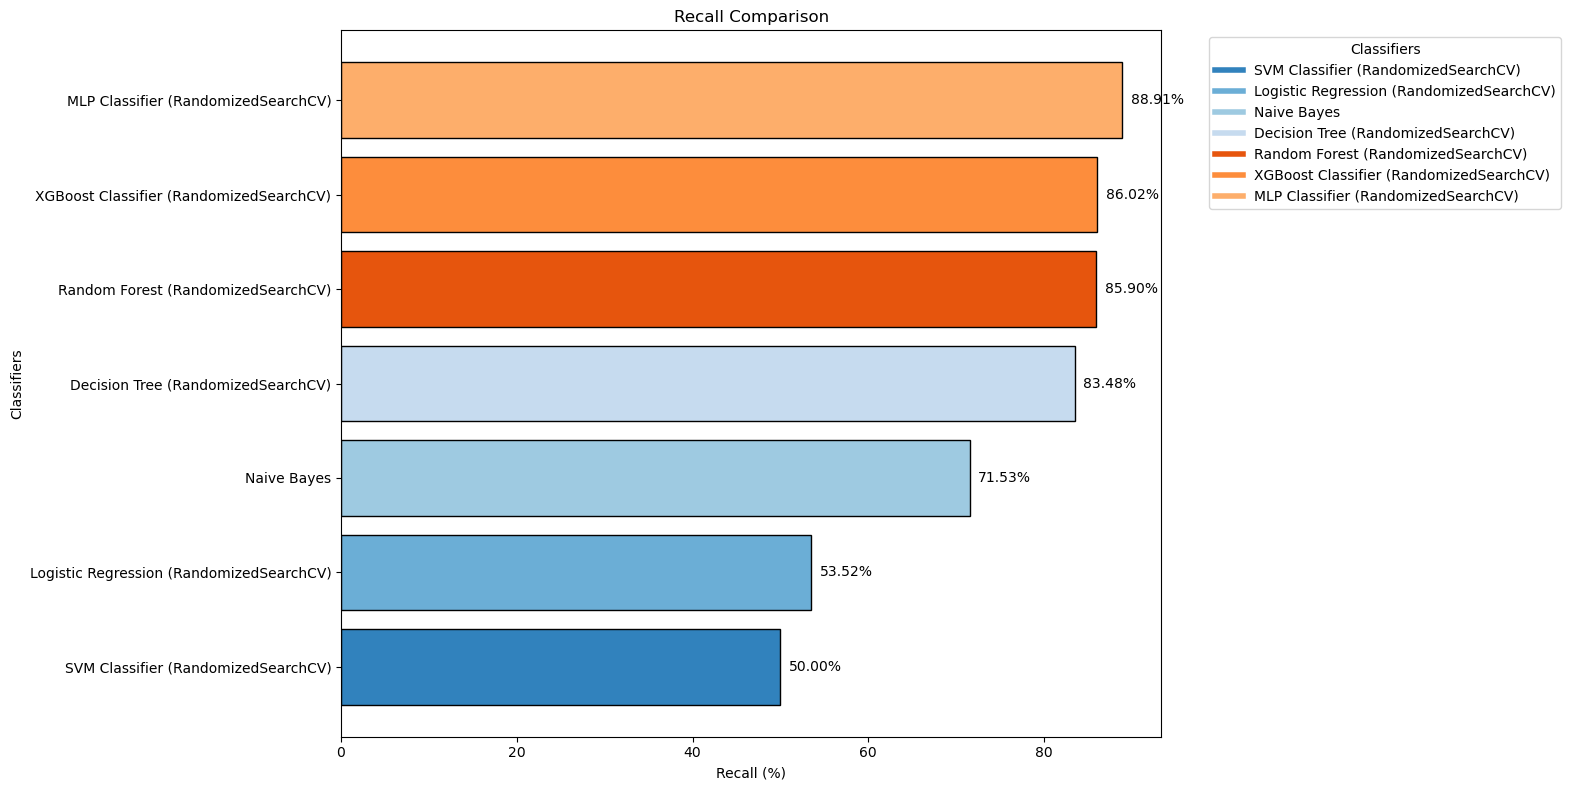

In [80]:
# Plot Recall Score
plot_metric('Recall', 'Recall Comparison', 'Recall (%)')

### F1 score

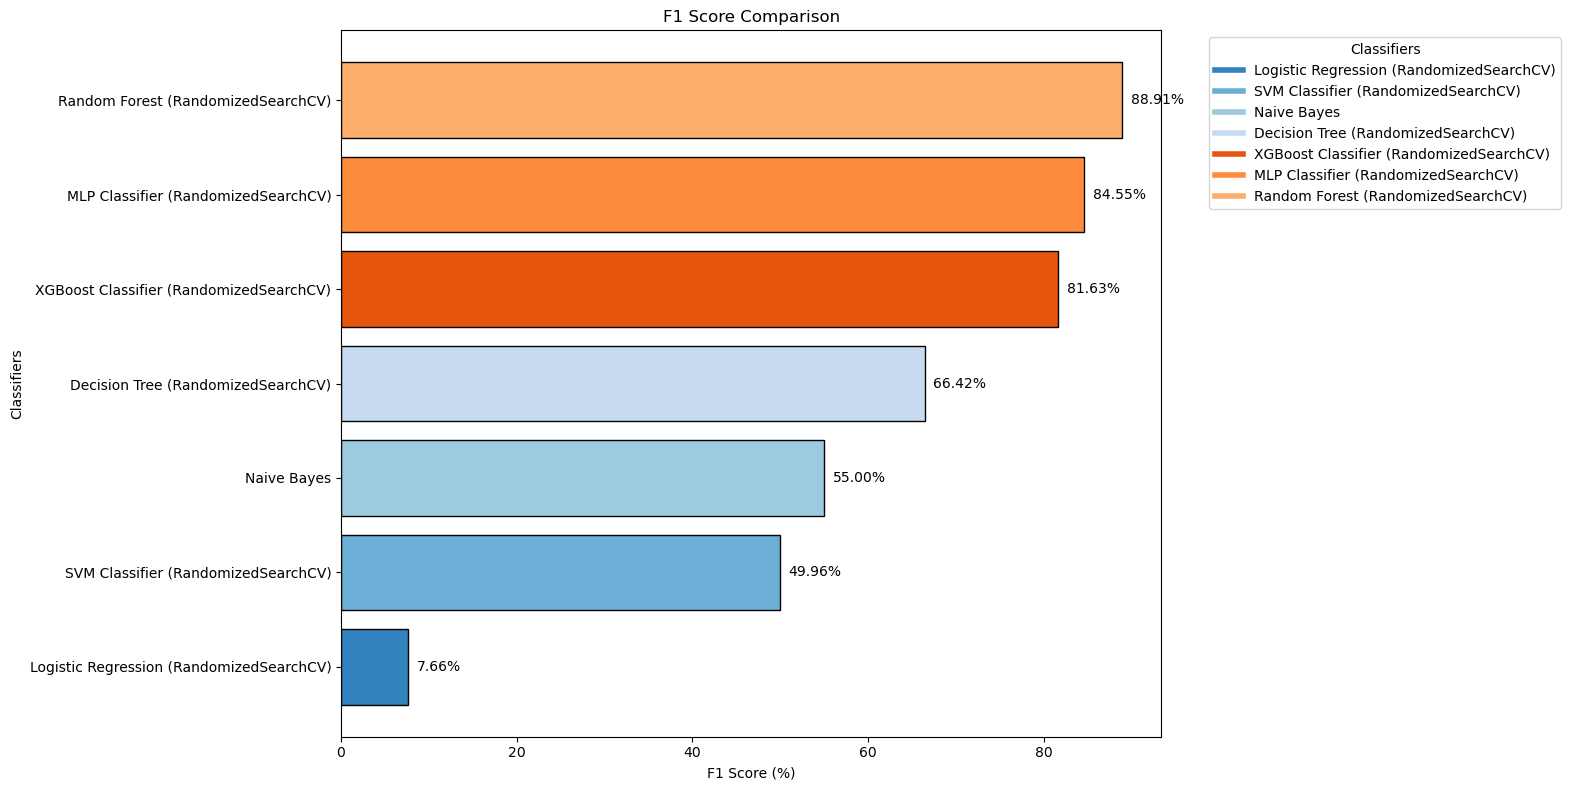

In [82]:
# Plot F1 Score
plot_metric('F1 Score', 'F1 Score Comparison', 'F1 Score (%)')


### AUC Score

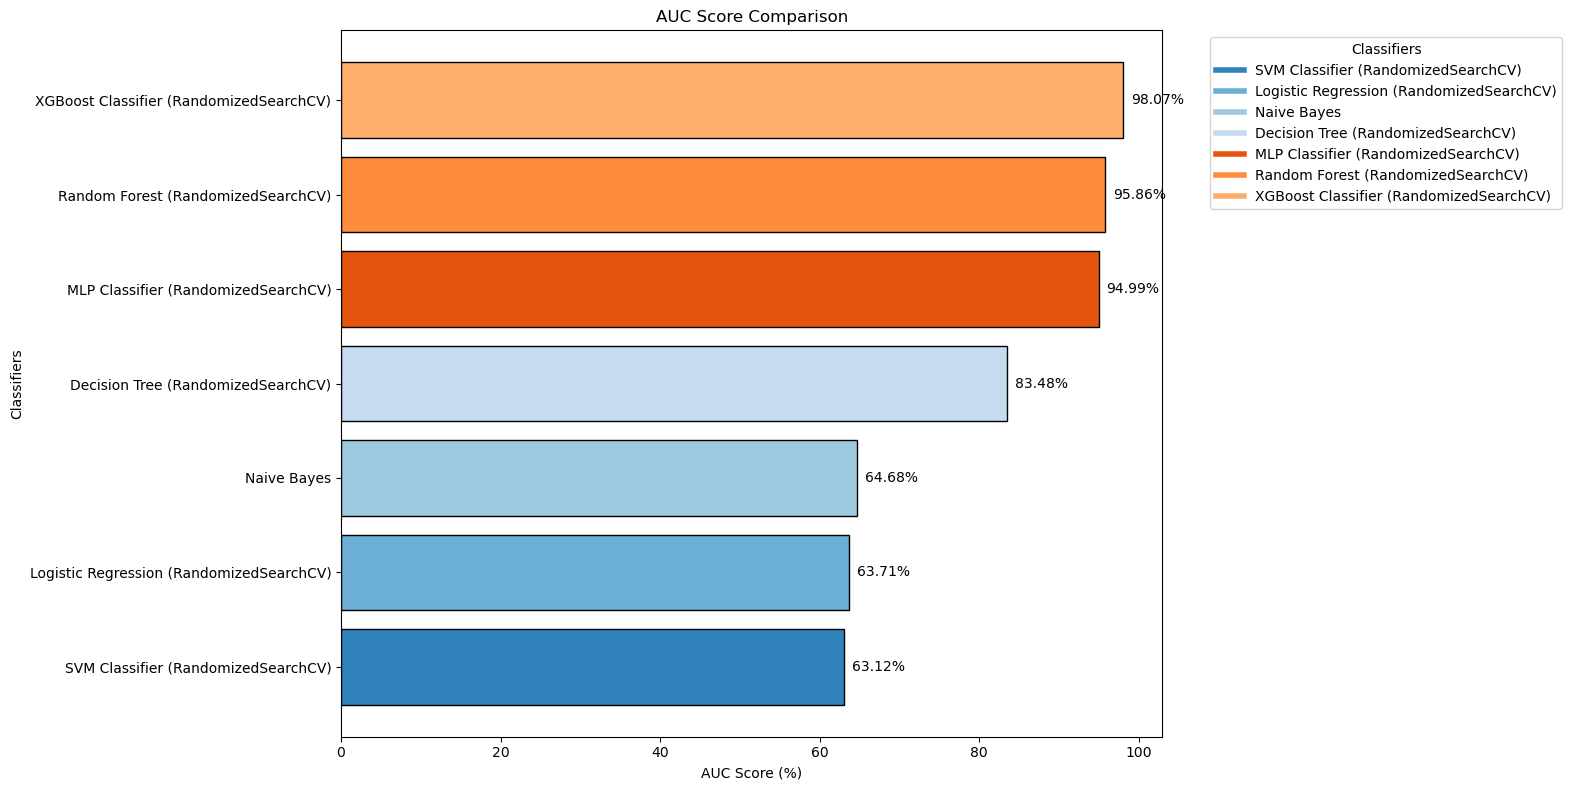

In [83]:
# Plot AUC Score
plot_metric('AUC Score', 'AUC Score Comparison', 'AUC Score (%)')

In [ ]:
# from imblearn.over_sampling import SMOTE
# #from imblearn.combine import SMOTETomek

# oversampler = SMOTE(random_state = 0, n_jobs = -1)
# #sampler = SMOTETomek(random_state = 0)
# model_train_lr , model_test_lr = oversampler.fit_resample(model_train, model_test)

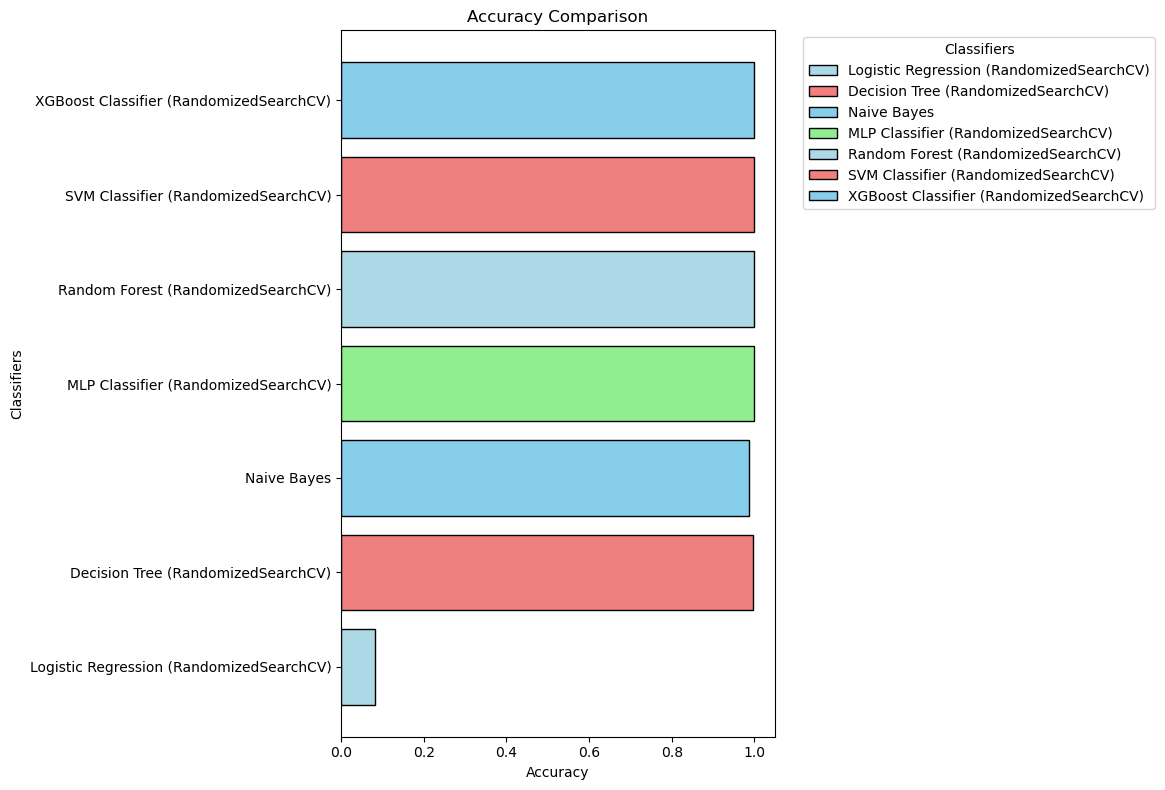

In [71]:
import matplotlib.pyplot as plt

def plot_accuracy():
    if 'Accuracy' in metrics_df.columns:
        plt.figure(figsize=(12, 8))
        
        # Define colors for each classifier
        colors = ['lightblue', 'lightcoral', 'skyblue', 'lightgreen']
        
        # Plot bars for each classifier with different colors
        bars = plt.barh(metrics_df.index, metrics_df['Accuracy'], color=colors, edgecolor='k')
        
        # Add a legend
        plt.legend(bars, metrics_df.index, title="Classifiers", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.title('Accuracy Comparison')
        plt.xlabel('Accuracy')
        plt.ylabel('Classifiers')
        plt.tight_layout()
        plt.show()
    else:
        print("Metric 'Accuracy' not found in the DataFrame.")

# Plot Accuracy
plot_accuracy()


### ROC Curve

In [92]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, recall_score, roc_auc_score, 
                             precision_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Function to load and combine model scores from pickle files
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)

# Assuming that each entry in the combined_model_scores contains:
# - 'true_labels': The true labels
# - 'predicted_labels': The predicted labels from the model
# - 'predicted_probabilities': The predicted probabilities from the model (for ROC AUC)

# Extract relevant data
true_labels = combined_model_scores.get('true_labels', None)
model_predictions = {model_name: metrics.get('predicted_labels', None) for model_name, metrics in combined_model_scores.items() if 'predicted_labels' in metrics}
model_probabilities = {model_name: metrics.get('predicted_probabilities', None) for model_name, metrics in combined_model_scores.items() if 'predicted_probabilities' in metrics}

# Calculate and print metrics for each model
for model_name in model_predictions:
    predictions = model_predictions[model_name]
    probabilities = model_probabilities.get(model_name, None)

    # Metrics calculations
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    auc_score = roc_auc_score(true_labels, probabilities) if probabilities is not None else None
    precision = precision_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    cm = confusion_matrix(true_labels, predictions)
    class_report = classification_report(true_labels, predictions)
    
    # Print metrics
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4%}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {auc_score:.4f}" if auc_score is not None else "ROC AUC: Not available")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(class_report)

    # Convert confusion matrix to DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=['True Normal', 'True Fraud'], columns=['Prediction Normal', 'Prediction Fraud'])
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


### Evaluate Metrics

In [ ]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
# lr.fit(X_train, Y_train)

In [93]:
import pickle

# Function to load and combine model scores from pickle files
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)


In [94]:
from sklearn.metrics import (accuracy_score, recall_score, roc_auc_score, 
                             precision_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Extract relevant data
true_labels = combined_model_scores.get('true_labels', None)
model_predictions = {model_name: metrics.get('predicted_labels', None) for model_name, metrics in combined_model_scores.items() if 'predicted_labels' in metrics}
model_probabilities = {model_name: metrics.get('predicted_probabilities', None) for model_name, metrics in combined_model_scores.items() if 'predicted_probabilities' in metrics}

for model_name in model_predictions:
    predictions = model_predictions[model_name]
    probabilities = model_probabilities.get(model_name, None)
    
    # Metrics calculations
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    auc_score = roc_auc_score(true_labels, probabilities) if probabilities is not None else None
    precision = precision_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    cm = confusion_matrix(true_labels, predictions)
    class_report = classification_report(true_labels, predictions)
    
    # Print metrics
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4%}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {auc_score:.4f}" if auc_score is not None else "ROC AUC: Not available")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(class_report)


In [ ]:
# lr_predict = lr.predict(X_test)

In [95]:
import pickle

# Function to load and combine model scores from pickle files
def load_model_scores(file_paths):
    model_scores = {}
    for file_path in file_paths:
        try:
            with open(file_path, 'rb') as f:
                model_scores.update(pickle.load(f))
        except FileNotFoundError:
            print(f"The file '{file_path}' was not found. Please check the path and try again.")
    return model_scores

# Define the paths to the pickle files
file_paths = [
    'model_scores_lr_nb_dt_mlp.pkl',
    'model_scores_rf.pkl',
    'model_scores_svm.pkl',
    'model_scores_xgb.pkl'
]

# Load and combine all model scores
combined_model_scores = load_model_scores(file_paths)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Initialize dictionaries to store the performance metrics for all models
# Prediction_Accuracy = {}
# Prediction_Recall = {}
# Prediction_AUC = {}
# Prediction_f1_score = {}

# # Extract metrics from model_scores dictionary
# for model_name, metrics in combined_model_scores.items():
#     Prediction_Accuracy[model_name] = metrics['Accuracy']
#     Prediction_Recall[model_name] = metrics['Recall']
#     Prediction_AUC[model_name] = metrics['AUC Score']
#     Prediction_f1_score[model_name] = metrics['F1 Score']

# # Display the prediction accuracy for all models
# print("Prediction Accuracy for All Models:")
# for model, accuracy in Prediction_Accuracy.items():
#     print(f"{model}: {accuracy:.4f}")

# # Plot AUC Score
# plt.figure(figsize=(10, 6))
# plt.title('AUC Score Comparison')
# plt.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center', color='skyblue')
# plt.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
# plt.xlabel('AUC Score')
# plt.show()

# # Plot F1 Score
# plt.figure(figsize=(10, 6))
# plt.title('F1 Score Comparison')
# plt.barh(range(len(Prediction_f1_score)), list(Prediction_f1_score.values()), align='center', color='lightgreen')
# plt.yticks(range(len(Prediction_f1_score)), list(Prediction_f1_score.keys()))
# plt.xlabel('F1 Score')
# plt.show()

# # Plot Recall
# plt.figure(figsize=(10, 6))
# plt.title('Recall Score Comparison')
# plt.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center', color='lightcoral')
# plt.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
# plt.xlabel('Recall Score')
# plt.show()

# # Plot Accuracy
# plt.figure(figsize=(10, 6))
# plt.title('Accuracy Comparison')
# plt.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center', color='lightblue')
# plt.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
# plt.xlabel('Accuracy')
# plt.show()

# # Display the metrics in tabular format (optional for better analysis)
# import pandas as pd

# metrics_df = pd.DataFrame({
#     'Accuracy': Prediction_Accuracy,
#     'Recall': Prediction_Recall,
#     'AUC Score': Prediction_AUC,
#     'F1 Score': Prediction_f1_score
# }).T

# print("\nSummary of Metrics for All Models:")
# print(metrics_df)


In [ ]:
# # Initialize dictionaries to store the performance metrics for all models
# Prediction_Accuracy = {}
# Prediction_Recall = {}
# Prediction_AUC = {}
# Prediction_f1_score = {}

# # Extract metrics from combined_model_scores dictionary
# for model_name, metrics in combined_model_scores.items():
#     Prediction_Accuracy[model_name] = metrics['Accuracy']
#     Prediction_Recall[model_name] = metrics['Recall']
#     Prediction_AUC[model_name] = metrics['AUC Score']
#     Prediction_f1_score[model_name] = metrics['F1 Score']

# # Display the prediction accuracy for all models
# print("Prediction Accuracy for All Models:")
# for model, accuracy in Prediction_Accuracy.items():
#     print(f"{model}: {accuracy:.4f}")


#### Plot Accuracy Comparison

In [ ]:
# # Plot Accuracy with percentages and different colors for each classifier
# plt.figure(figsize=(12, 6))
# bars = plt.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center', color=colors)
# plt.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
# plt.xlabel('Accuracy')
# plt.title('Accuracy Comparison')

# # Add percentage labels on bars
# for bar in bars:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
#              va='center', ha='left', fontsize=12, color='black')

# # Add a legend
# plt.legend(bars, Prediction_Accuracy.keys(), loc='lower right')
# plt.show()

#### Plot Recall Score Comparison

In [ ]:
# # Plot Recall Score with percentages and different colors for each classifier
# plt.figure(figsize=(12, 6))
# bars = plt.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center', color=colors)
# plt.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
# plt.xlabel('Recall Score')
# plt.title('Recall Score Comparison')

# # Add percentage labels on bars
# for bar in bars:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
#              va='center', ha='left', fontsize=12, color='black')

# # Add a legend
# plt.legend(bars, Prediction_Recall.keys(), loc='lower right')
# plt.show()

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrices for the classifiers
confusion_matrices = {
    'Logistic Regression': [[4579, 52072], [1, 94]],
    'Decision Tree': [[56423, 228], [31, 64]],
    'Naive Bayes': [[55998, 653], [53, 42]],
    'MLP Classifier': [[56606, 45], [21, 74]],
    'Random Forest': [[84958, 18], [40, 102]],
    'SVM Classifier': [[56651, 0], [95, 0]],
    'XGBoost': [[56630, 23], [13, 80]]
}

# Function to plot confusion matrix heatmap
def plot_confusion_heatmap(confusion_matrix, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted No', 'Predicted Yes'], 
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f'Confusion Matrix Heatmap for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot each confusion matrix in separate cells
# # Logistic Regression
# plot_confusion_heatmap(confusion_matrices['Logistic Regression'], 'Logistic Regression')

# # Decision Tree
# plot_confusion_heatmap(confusion_matrices['Decision Tree'], 'Decision Tree')

# # Naive Bayes
# plot_confusion_heatmap(confusion_matrices['Naive Bayes'], 'Naive Bayes')

# # MLP Classifier
# plot_confusion_heatmap(confusion_matrices['MLP Classifier'], 'MLP Classifier')

# # Random Forest
# plot_confusion_heatmap(confusion_matrices['Random Forest'], 'Random Forest')

# # SVM Classifier
# plot_confusion_heatmap(confusion_matrices['SVM Classifier'], 'SVM Classifier')

# # XGBoost
# plot_confusion_heatmap(confusion_matrices['XGBoost'], 'XGBoost')


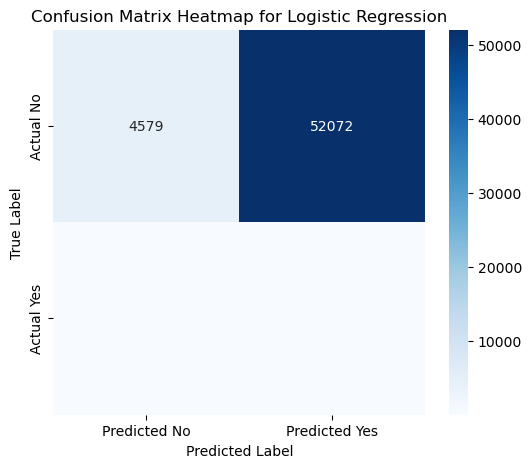

In [97]:
# Logistic Regression
plot_confusion_heatmap(confusion_matrices['Logistic Regression'], 'Logistic Regression')

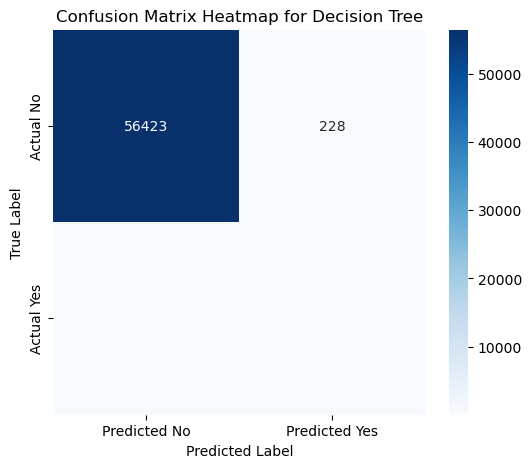

In [98]:
# Decision Tree
plot_confusion_heatmap(confusion_matrices['Decision Tree'], 'Decision Tree')


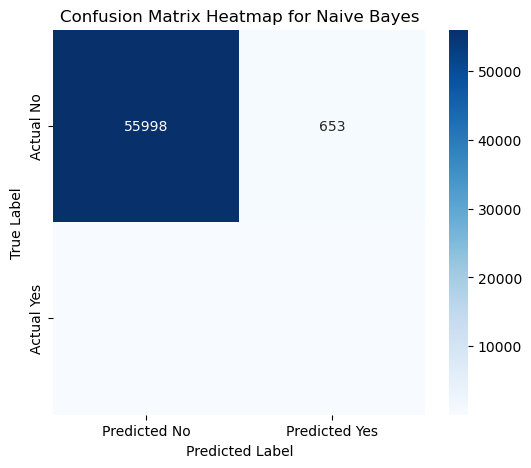

In [99]:
# Naive Bayes
plot_confusion_heatmap(confusion_matrices['Naive Bayes'], 'Naive Bayes')

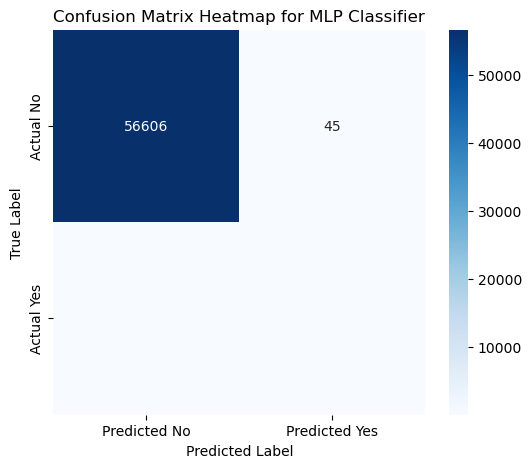

In [100]:
# MLP Classifier
plot_confusion_heatmap(confusion_matrices['MLP Classifier'], 'MLP Classifier')

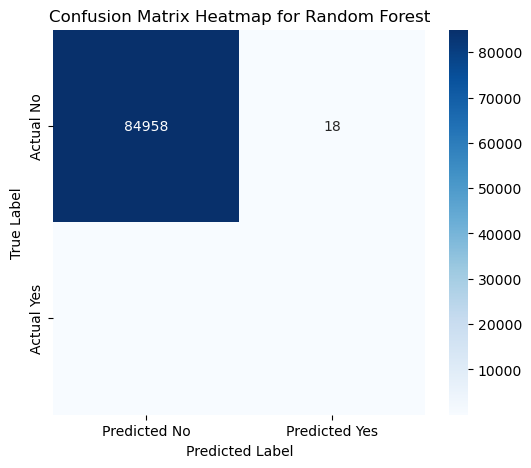

In [101]:
# Random Forest
plot_confusion_heatmap(confusion_matrices['Random Forest'], 'Random Forest')

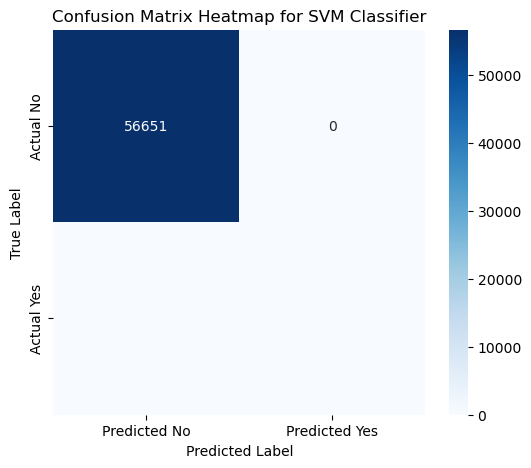

In [102]:
# SVM Classifier
plot_confusion_heatmap(confusion_matrices['SVM Classifier'], 'SVM Classifier')

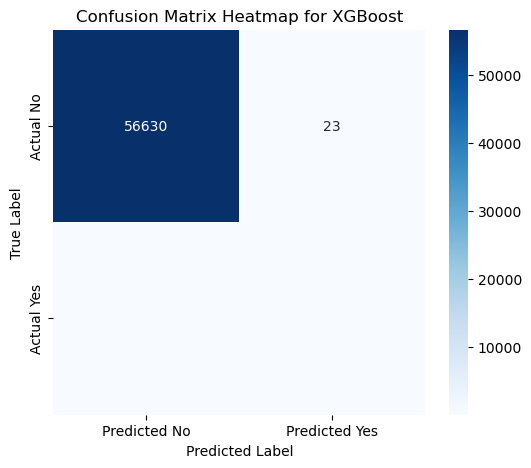

In [103]:
# XGBoost
plot_confusion_heatmap(confusion_matrices['XGBoost'], 'XGBoost')

#### Plot F1 Score Comparison

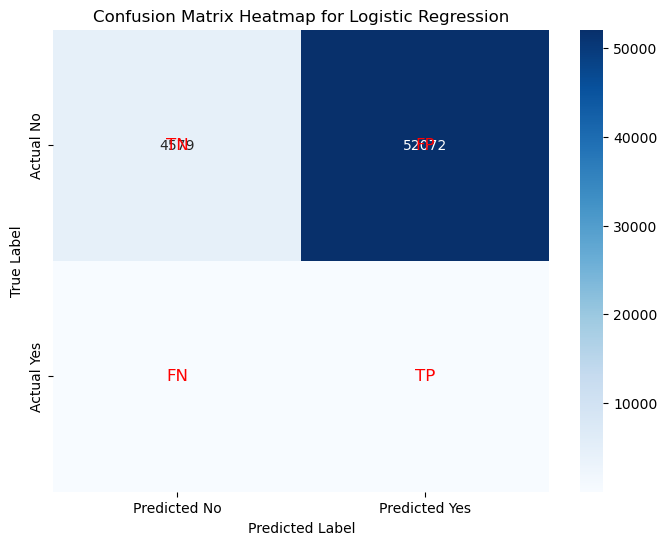

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrices for the classifiers
confusion_matrices = {
    'Logistic Regression': [[4579, 52072], [1, 94]],
    'Decision Tree': [[56423, 228], [31, 64]],
    'Naive Bayes': [[55998, 653], [53, 42]],
    'MLP Classifier': [[56606, 45], [21, 74]],
    'Random Forest': [[84958, 18], [40, 102]],
    'SVM Classifier': [[56651, 0], [95, 0]],
    'XGBoost': [[56630, 23], [13, 80]]
}

# Function to plot confusion matrix heatmap with clear annotations for each category
def plot_confusion_heatmap(confusion_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted No', 'Predicted Yes'], 
                yticklabels=['Actual No', 'Actual Yes'])
    
    # Adding specific annotations to identify TP, TN, FP, FN
    plt.text(0.5, 0.5, 'TN', ha='center', va='center', fontsize=12, color='red')
    plt.text(1.5, 0.5, 'FP', ha='center', va='center', fontsize=12, color='red')
    plt.text(0.5, 1.5, 'FN', ha='center', va='center', fontsize=12, color='red')
    plt.text(1.5, 1.5, 'TP', ha='center', va='center', fontsize=12, color='red')
    
    plt.title(f'Confusion Matrix Heatmap for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot each confusion matrix in separate cells
# Logistic Regression
plot_confusion_heatmap(confusion_matrices['Logistic Regression'], 'Logistic Regression')



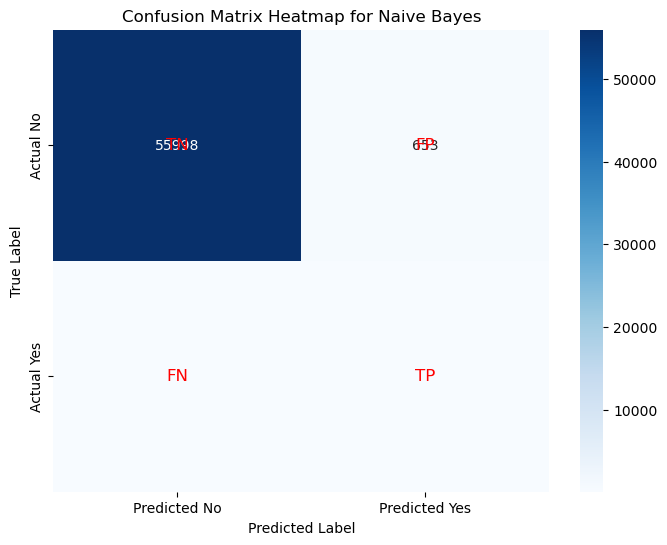

In [106]:
# Naive Bayes
plot_confusion_heatmap(confusion_matrices['Naive Bayes'], 'Naive Bayes')

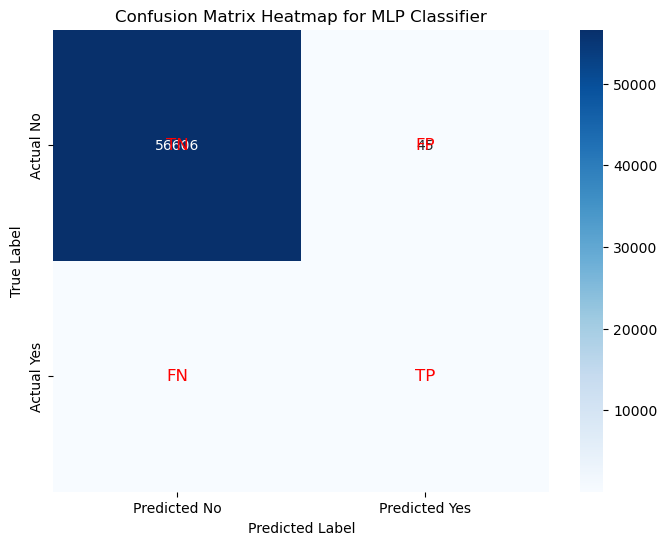

In [107]:
# MLP Classifier
plot_confusion_heatmap(confusion_matrices['MLP Classifier'], 'MLP Classifier')

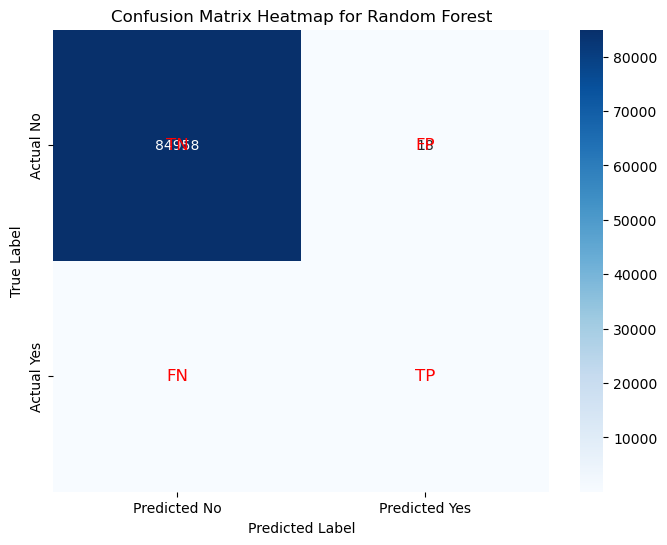

In [108]:
# Random Forest
plot_confusion_heatmap(confusion_matrices['Random Forest'], 'Random Forest')


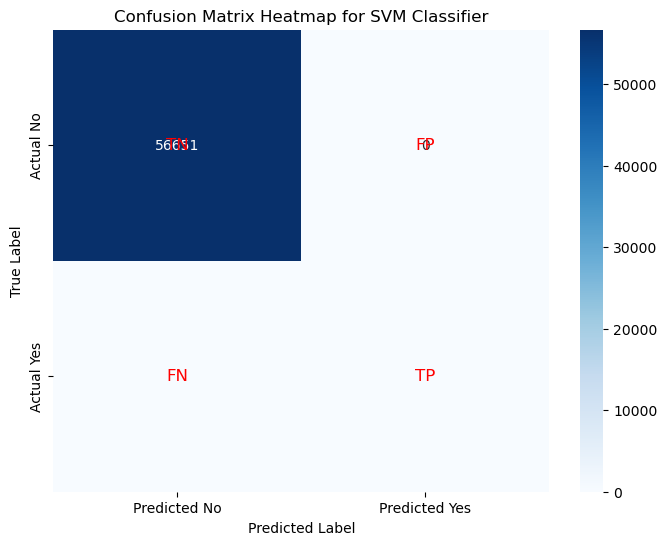

In [109]:
# SVM Classifier
plot_confusion_heatmap(confusion_matrices['SVM Classifier'], 'SVM Classifier')

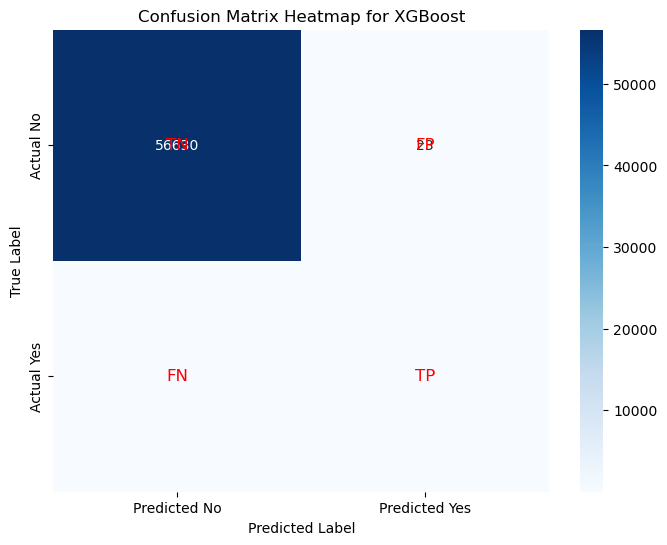

In [110]:
# XGBoost
plot_confusion_heatmap(confusion_matrices['XGBoost'], 'XGBoost')

In [ ]:
# # Plot F1 Score with percentages and different colors for each classifier
# plt.figure(figsize=(12, 6))
# bars = plt.barh(range(len(Prediction_f1_score)), list(Prediction_f1_score.values()), align='center', color=colors)
# plt.yticks(range(len(Prediction_f1_score)), list(Prediction_f1_score.keys()))
# plt.xlabel('F1 Score')
# plt.title('F1 Score Comparison')

# # Add percentage labels on bars
# for bar in bars:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
#              va='center', ha='left', fontsize=12, color='black')

# # Add a legend
# plt.legend(bars, Prediction_f1_score.keys(), loc='lower right')
# plt.show()

#### Plot AUC Score Comparison

In [ ]:
# # Plot AUC Score with percentages and different colors for each classifier
# plt.figure(figsize=(12, 6))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Customize colors
# bars = plt.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center', color=colors)
# plt.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
# plt.xlabel('AUC Score')
# plt.title('AUC Score Comparison')

# # Add percentage labels on bars
# for bar in bars:
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
#              va='center', ha='left', fontsize=12, color='black')

# # Add a legend
# plt.legend(bars, Prediction_AUC.keys(), loc='lower right')
# plt.show()

#### Display Metrics in Tabular Format

In [ ]:
# # Display the metrics in tabular format
# import pandas as pd

# metrics_df = pd.DataFrame({
#     'Accuracy': Prediction_Accuracy,
#     'Recall': Prediction_Recall,
#     'AUC Score': Prediction_AUC,
#     'F1 Score': Prediction_f1_score
# }).T

# print("\nSummary of Metrics for All Models:")
# print(metrics_df)

### Prediction Scores

In [ ]:
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score,precision_score,f1_score,classification_report
# import seaborn as sns
# from matplotlib import pyplot

# lr_accuracy = accuracy_score(Y_test, lr_predict)
# lr_recall = recall_score(Y_test, lr_predict)
# lr_cm = confusion_matrix(Y_test, lr_predict)
# lr_auc = roc_auc_score(Y_test, lr_predict)
# lr_precision = precision_score(Y_test, lr_predict)
# lr_f1 = f1_score(Y_test, lr_predict)
# lr_cl = classification_report(Y_test, lr_predict)

# print("Accuracy of Logistic Regression: {:.4%}".format(lr_accuracy))
# print("Recall: ",(lr_recall))
# print("ROC AUC: ",(lr_auc))
# print("precision score: ",(lr_precision))
# print("f1 score: ",(lr_f1))
# print("confusion matrix:\n",(lr_cm))
# print("classification report:\n",(lr_cl))

# lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
# pyplot.figure(figsize = (8,4))
# sns.set(font_scale=1.4)
# sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Random Forest Classifier

In [ ]:
# from imblearn.over_sampling import ADASYN
# sampler = ADASYN(random_state = 0, n_jobs = -1)
# model_train_rf , model_test_rf = sampler.fit_resample(model_train, model_test)

### Shuffle Splitting the data into training and testing

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [ ]:
# for train_index, test_index in sss.split(model_train_rf, model_test_rf):
#     X_train, X_test = model_train_rf[train_index], model_train_rf[test_index]
#     Y_train, Y_test = model_test_rf[train_index], model_test_rf[test_index]

### Building Supervised Model

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
# rf.fit(X_train, Y_train)

In [ ]:
# rf_predict = rf.predict(X_test)

### Prediction Scores

In [ ]:
# rf_accuracy = accuracy_score(Y_test, rf_predict)
# rf_recall = recall_score(Y_test, rf_predict)
# rf_cm = confusion_matrix(Y_test, rf_predict)
# rf_auc = roc_auc_score(Y_test, rf_predict)
# rf_precision = precision_score(Y_test, rf_predict)
# rf_f1 = f1_score(Y_test, rf_predict)
# rf_cl = classification_report(Y_test, rf_predict)

# print("Accuracy of Random Forest: {:.4%}".format(rf_accuracy))
# print("Recall: ",(rf_recall))
# print("ROC AUC: ",(rf_auc))
# print("precision score: ",(rf_precision))
# print("f1 score: ",(rf_f1))
# print("confusion matrix:\n",(rf_cm))
# print("classification report:\n",(rf_cl))

# rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
# pyplot.figure(figsize = (8,4))
# sns.set(font_scale=1.4)
# sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

## K-Means Clustering

In [ ]:
# from imblearn.over_sampling import ADASYN
# under_sampler = ADASYN(random_state = 0, n_jobs = -1)
# model_train_km , model_test_km = sampler.fit_resample(model_train, model_test)

### Optimal Clusters

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0)
#     kmeans.fit(model_train_km)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

### Unsupervised Clustering

In [ ]:
# kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0).fit(model_train_km)

In [ ]:
# centers = kmeans.cluster_centers_

In [ ]:
# from scipy import spatial
# distance = pd.DataFrame(spatial.distance.cdist(model_train_km, centers, 'euclidean'))
# distance['distance_mean'] = distance.apply(np.mean, axis=1)
# distance.head()

In [ ]:
# out_per = np.percentile(distance['distance_mean'], 95)

In [ ]:
# model_predict_km = np.where(distance['distance_mean'] >= out_per, 1, 0)

### Prediction Scores

In [ ]:
# km_accuracy = accuracy_score(model_test_km, model_predict_km)
# km_recall = recall_score(model_test_km, model_predict_km)
# km_cm = confusion_matrix(model_test_km, model_predict_km)
# km_auc = roc_auc_score(model_test_km, model_predict_km)
# km_precision = precision_score(model_test_km, model_predict_km)
# km_f1 = f1_score(model_test_km, model_predict_km)
# km_cl = classification_report(model_test_km, model_predict_km)

# print("Accuracy of K-means: {:.4%}".format(km_accuracy))
# print("Recall: ",(km_recall))
# print("ROC AUC: ",(km_auc))
# print("precision score: ",(km_precision))
# print("f1 score: ",(km_f1))
# print("confusion matrix:\n",(km_cm))
# print("classification report:\n",(km_cl))

# km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
# pyplot.figure(figsize = (8,4))
# sns.set(font_scale=1.4)
# sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

In [ ]:
# Prediction_Accuracy={
#     'Logistic Regression': lr_accuracy,
#     'Random Forest': rf_accuracy,
#     'K-Means': km_accuracy
# }

# Prediction_Recall={
#     'Logistic Regression': lr_recall,
#     'Random Forest': rf_recall,
#     'K-Means': km_recall
# }

# Prediction_AUC={
#     'Logistic Regression': lr_auc,
#     'Random Forest': rf_auc,
#     'K-Means': km_auc
# }

# Prediction_f1_score={
#     'Logistic Regression': lr_f1,
#     'Random Forest': rf_f1,
#     'K-Means': km_f1
# }

In [ ]:
# pyplot.title('Accuracy')
# pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
# pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
# pyplot.xlabel('Accuracy Score')

In [ ]:
# pyplot.title('Recall')
# pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
# pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
# pyplot.xlabel('Recall Score')

In [ ]:
# pyplot.title('AUC Score')
# pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
# pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
# pyplot.xlabel('AUC Score')

In [ ]:
# pyplot.title('f1 Score')
# pyplot.barh(range(len(Prediction_f1_score)), list(Prediction_f1_score.values()), align='center')
# pyplot.yticks(range(len(Prediction_f1_score)), list(Prediction_f1_score.keys()))
# pyplot.xlabel('f1 Score')

In [ ]:
# rf_accuracy = accuracy_score(Y_test, rf_predict)
# print("Accuracy of Random Forest: {:.4%}".format(rf_accuracy))
# km_accuracy = accuracy_score(model_test_km, model_predict_km)
# print("Accuracy of K-means: {:.4%}".format(km_accuracy))